In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [63]:
# Load data
P8_C_F_otus_data = pd.read_csv('./P8_C_F/data_normalized.csv',sep=',',index_col=0)
P8_C_F_metadata = pd.read_csv('./P8_C_F/P8_C_F.csv',sep=',',index_col=0)
P8_C_F_otus_data.head(10)

,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,49
Lactobacillus,8.897736e+06,8.567618e+06,8.742705e+06,2.759672e+05,6.973386e+05,2.561120e+05,8.943864e+06,8.768577e+06,1.449831e+06,5.038006e+05,...,5.294519e+06,7.169531e+06,6.686188e+06,5.306953e+06,3.559897e+06,7.753555e+05,5.392391e+06,5.250797e+06,8.060608e+06,7.510279e+06
Escherichia_Shigella,1.444014e+04,1.423959e+04,7.019514e+03,8.793847e+06,7.525722e+06,7.659895e+06,1.421953e+05,6.618399e+03,7.227492e+06,7.914201e+06,...,4.294138e+06,1.897475e+06,2.988709e+06,4.332845e+06,5.436514e+06,8.336977e+06,4.162773e+06,4.361726e+06,5.597561e+05,1.748060e+06
Muribacter,1.642566e+05,1.349752e+05,1.772929e+05,8.022302e+03,2.843906e+05,8.343194e+04,1.464070e+05,2.761677e+05,4.432322e+04,2.202122e+05,...,3.850705e+04,8.423417e+04,4.773270e+04,3.409478e+04,8.824532e+03,1.925352e+04,6.959347e+04,7.440685e+04,3.210926e+05,1.564349e+05
Staphylococcus,1.772929e+05,4.336054e+05,3.461623e+05,1.427970e+05,8.575841e+05,7.300295e+04,8.022302e+02,1.002788e+03,7.364473e+05,1.007200e+06,...,2.607248e+03,3.610036e+03,4.011151e+03,2.807806e+03,2.787750e+04,9.827320e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Streptococcus,5.653717e+05,5.900403e+05,5.286697e+05,5.415054e+03,6.137061e+04,2.386635e+04,5.633662e+05,7.573053e+05,2.547081e+04,9.907543e+04,...,2.264295e+05,2.859951e+05,1.768918e+05,2.097832e+05,1.929364e+05,7.681354e+04,2.360562e+05,2.200116e+05,8.792443e+05,4.207697e+05
Enterococcus,1.062955e+04,2.807806e+03,1.403903e+03,1.283568e+04,8.423417e+03,3.228977e+04,2.607248e+03,3.610036e+03,8.824532e+03,5.615611e+03,...,2.607248e+03,4.011151e+03,5.415054e+03,1.584405e+04,1.042899e+04,4.612824e+03,1.604460e+03,2.206133e+03,1.403903e+03,3.208921e+03
Pseudomonas,0.000000e+00,2.005575e+02,2.005575e+02,0.000000e+00,0.000000e+00,3.208921e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.604460e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,2.005575e+02,4.011151e+02,1.203345e+03,0.000000e+00,8.022302e+02,2.005575e+02,0.000000e+00
Lachnospiraceae_NK4A136_group,4.612824e+03,1.343736e+04,1.403903e+04,3.971039e+04,3.088586e+04,1.079000e+05,8.824532e+03,1.183290e+04,2.767694e+04,1.383847e+04,...,7.621187e+03,2.908084e+04,5.013939e+03,5.615611e+03,4.652935e+04,4.672991e+04,9.025090e+03,1.604460e+03,1.243457e+04,8.824532e+03
Muribaculaceae,3.228977e+04,5.856280e+04,3.329255e+04,1.961453e+05,1.379836e+05,4.362127e+05,4.793325e+04,4.211709e+04,1.472092e+05,7.139849e+04,...,3.770482e+04,1.367802e+05,2.065743e+04,2.266300e+04,1.937386e+05,1.867191e+05,2.527025e+04,2.105854e+04,5.134273e+04,4.652935e+04
Lachnospiraceae,1.805018e+03,4.612824e+03,4.011151e+03,2.065743e+04,9.225647e+03,4.973827e+04,5.013939e+03,3.610036e+03,7.019514e+03,4.612824e+03,...,2.206133e+03,1.083011e+04,1.805018e+03,2.005575e+03,1.805018e+04,2.446802e+04,2.206133e+03,1.805018e+03,3.008363e+03,1.805018e+03


In [64]:

def sort_meta(P8_C_F_metadata,condition = "Experiment"):
    new_meta_index = []
    for index1 in P8_C_F_metadata.index:
        new_meta_index.append(str(index1))
    P8_C_F_metadata.index = new_meta_index
    metadata = P8_C_F_metadata.sort_values(condition)
    return metadata
metadata = sort_meta(P8_C_F_metadata)
metadata.head(10)

,Experiment
1,C
47,C
46,C
43,C
42,C
41,C
40,C
30,C
48,C
24,C


In [65]:
def create_heatmap(otus_data,metadata,condition ="Experiment" ):
    heatmap = otus_data
    otus_data = otus_data.transpose()
    new_column = []
    new_idx = []
    for index1 in otus_data.index:
        new_idx.append(str(index1))
    otus_data.index = new_idx
    # print(otus_data)
    for index1 in otus_data.index:
        for index2 in metadata.index:
            value = metadata.loc[index2, condition]
            if str(index1) == str(index2):
                new_column.append(value)
    otus_data[condition] = new_column
    otus_data = otus_data.sort_values(by=condition)
    # print(otus_data)
    heatmap = otus_data.drop(columns=[condition])
    heatmap = heatmap.transpose()
    return heatmap
heatmap = create_heatmap(P8_C_F_otus_data,P8_C_F_metadata)
heatmap.head(10)

,1,47,46,43,42,41,40,30,48,24,...,26,9,10,21,20,19,18,17,34,32
Lactobacillus,8.897736e+06,5.250797e+06,5.392391e+06,5.306953e+06,6.686188e+06,7.169531e+06,5.294519e+06,6.901988e+06,8.060608e+06,6.695213e+06,...,9.580634e+05,1.449831e+06,5.038006e+05,1.655402e+06,3.256052e+06,5.003911e+05,1.514410e+06,1.949419e+05,7.741521e+04,2.219169e+06
Escherichia_Shigella,1.444014e+04,4.361726e+06,4.162773e+06,4.332845e+06,2.988709e+06,1.897475e+06,4.294138e+06,2.847316e+06,5.597561e+05,2.905678e+06,...,7.556006e+06,7.227492e+06,7.914201e+06,7.102345e+06,5.918052e+06,8.609133e+06,8.115962e+06,8.472754e+06,8.809490e+06,7.340206e+06
Muribacter,1.642566e+05,7.440685e+04,6.959347e+04,3.409478e+04,4.773270e+04,8.423417e+04,3.850705e+04,7.881912e+04,3.210926e+05,2.005575e+04,...,4.011151e+02,4.432322e+04,2.202122e+05,3.870761e+04,7.821744e+03,3.389423e+04,1.484126e+04,1.103067e+04,2.647360e+04,1.444014e+04
Staphylococcus,1.772929e+05,0.000000e+00,0.000000e+00,2.807806e+03,4.011151e+03,3.610036e+03,2.607248e+03,0.000000e+00,0.000000e+00,7.019514e+03,...,1.002788e+04,7.364473e+05,1.007200e+06,3.329255e+04,9.506428e+04,1.873208e+05,1.209362e+05,6.297507e+04,0.000000e+00,1.805018e+03
Streptococcus,5.653717e+05,2.200116e+05,2.360562e+05,2.097832e+05,1.768918e+05,2.859951e+05,2.264295e+05,1.399892e+05,8.792443e+05,2.454824e+05,...,2.406691e+03,2.547081e+04,9.907543e+04,4.412266e+03,1.644572e+04,2.426746e+04,2.888029e+04,2.908084e+04,8.022302e+02,9.225647e+03
Enterococcus,1.062955e+04,2.206133e+03,1.604460e+03,1.584405e+04,5.415054e+03,4.011151e+03,2.607248e+03,0.000000e+00,1.403903e+03,1.002788e+03,...,1.484126e+04,8.824532e+03,5.615611e+03,1.022844e+04,4.612824e+03,7.220072e+03,3.409478e+03,1.524237e+04,1.022844e+04,2.807806e+03
Pseudomonas,0.000000e+00,8.022302e+02,0.000000e+00,2.005575e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.005575e+02,0.000000e+00,...,3.610036e+03,0.000000e+00,1.604460e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.203345e+03,0.000000e+00,4.011151e+02
Lachnospiraceae_NK4A136_group,4.612824e+03,1.604460e+03,9.025090e+03,5.615611e+03,5.013939e+03,2.908084e+04,7.621187e+03,3.008363e+03,1.243457e+04,6.417842e+03,...,6.818957e+04,2.767694e+04,1.383847e+04,7.139849e+04,4.332043e+04,3.108642e+04,9.426205e+03,6.137061e+04,5.796113e+04,2.346523e+04
Muribaculaceae,3.228977e+04,2.105854e+04,2.527025e+04,2.266300e+04,2.065743e+04,1.367802e+05,3.770482e+04,3.409478e+03,5.134273e+04,3.008363e+04,...,3.006358e+05,1.472092e+05,7.139849e+04,2.525020e+05,1.652594e+05,1.413931e+05,4.993883e+04,2.900062e+05,3.036441e+05,9.165480e+04
Lachnospiraceae,1.805018e+03,1.805018e+03,2.206133e+03,2.005575e+03,1.805018e+03,1.083011e+04,2.206133e+03,0.000000e+00,3.008363e+03,6.016726e+02,...,3.489701e+04,7.019514e+03,4.612824e+03,4.131486e+04,1.805018e+04,2.125910e+04,2.206133e+03,3.349311e+04,3.028419e+04,7.621187e+03


In [66]:
def colordict(metadata,condition ='Experiment' ):
    color_dict=dict(zip(np.unique(metadata[condition]),np.array(['g','blue'])))
    row_colors = metadata[condition].map(color_dict)
    return color_dict,row_colors
color_dict,row_colors = colordict(metadata)

In [67]:
row_colors.head(10)

1     g
47    g
46    g
43    g
42    g
41    g
40    g
30    g
48    g
24    g
Name: Experiment, dtype: object

In [68]:
color_dict

{'C': 'g', 'F': 'blue'}

## P8 Control vs Feeding (Genus)

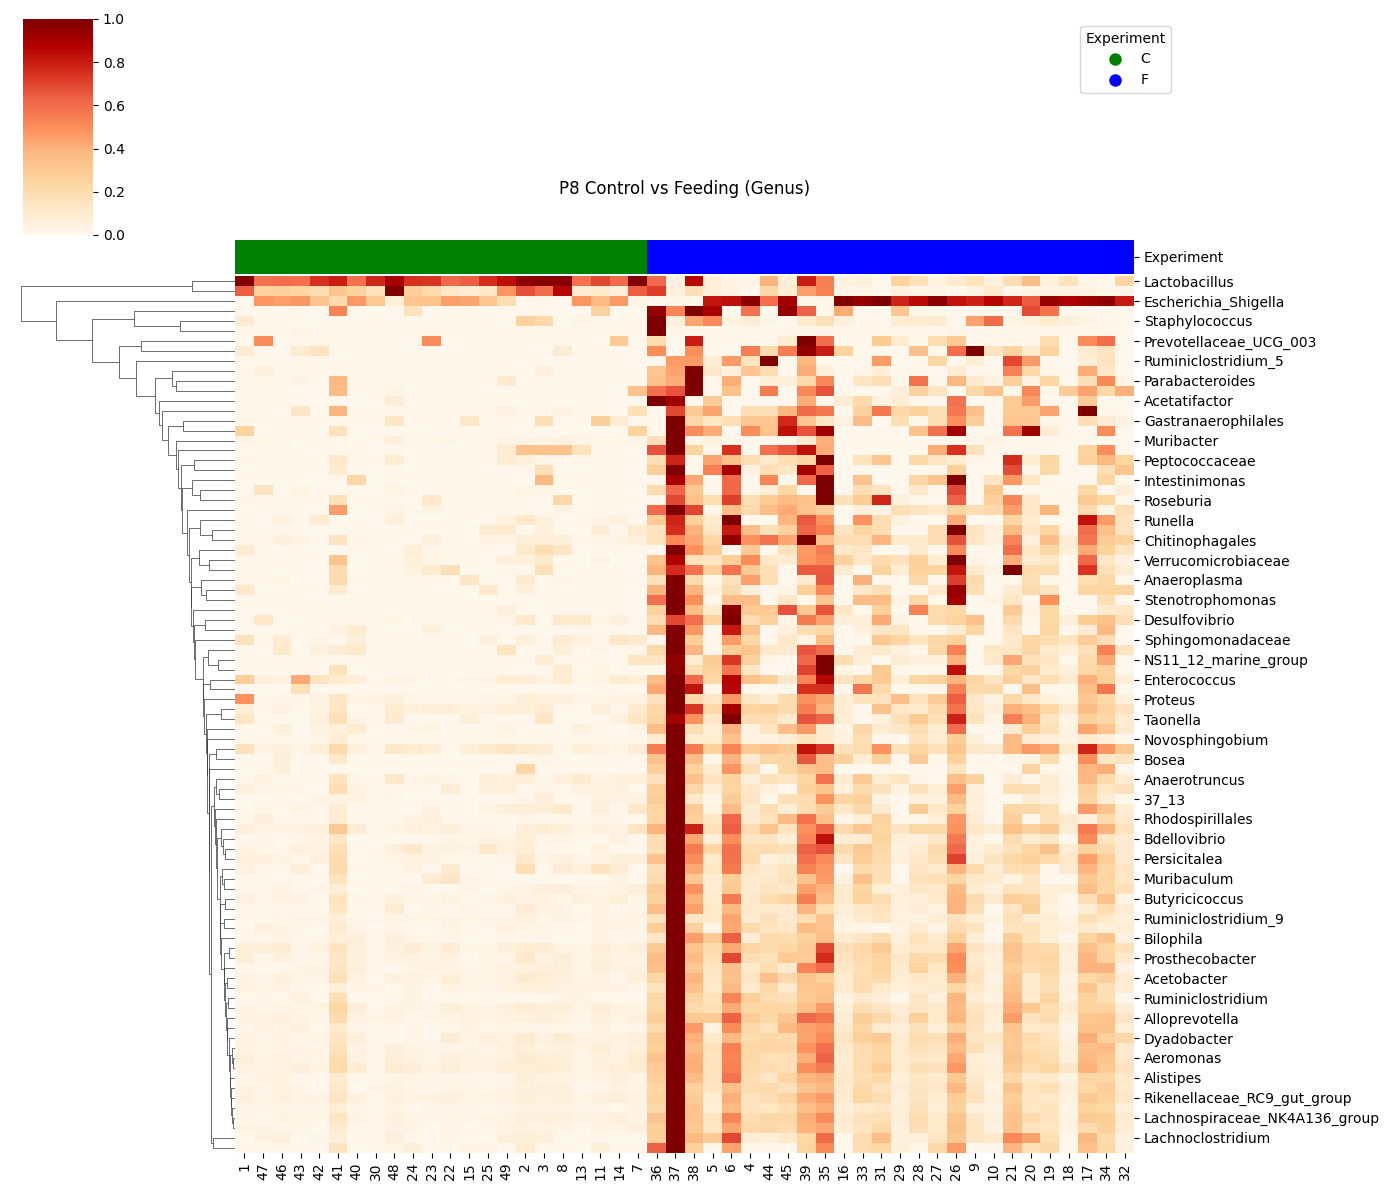

In [69]:
def plot_cluster_heatmap(heatmap,color_dict,row_colors,title):
    custom_cmap = sns.color_palette("OrRd", as_cmap=True)
    hm = sns.clustermap(heatmap,
                metric="correlation",
                standard_scale=0,
                z_score=None,
                col_colors=row_colors,
                col_cluster=False,
                cmap=custom_cmap,
                # cbar_pos=(0, .2, .03, .4),
                figsize=(14, 12))
    # Create a color legend using the color_dict
    legend_labels = [f"{experiment}" for experiment, color in color_dict.items()]
    legend_colors = [color for _, color in color_dict.items()]
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels, legend_colors)]
    plt.legend(handles=legend_handles, title="Experiment", bbox_to_anchor=(15, 1), loc='upper left')
    # Add a title to the center of the heatmap
    ax  = hm.ax_heatmap
    ax.text(0.5, 1.1, title, fontsize=12, ha="center", va="center", transform=ax.transAxes)
    # Get the current Axes objects
    ax_row_labels = hm.ax_row_dendrogram
    ax_col_labels = hm.ax_col_dendrogram

    # Set row and column labels font size
    row_font_size = 4
    col_font_size = 4

    for label in ax_row_labels.get_yticklabels():
        label.set_fontsize(row_font_size)

    for label in ax_col_labels.get_xticklabels():
        label.set_fontsize(col_font_size)

    # Display the plot
    plt.show()
title = "P8 Control vs Feeding (Genus)"
plot_cluster_heatmap(heatmap,color_dict,row_colors,title)


## P11_NEC_Non-NEC_Colon

### Load datasets

In [70]:
# Load data
P11_C_NEC_otus_data = pd.read_csv('./P11_NEC_Non-NEC/Colon/tsv/data_normalized.csv',sep=',',index_col=0)
P11_C_NEC_metadata = pd.read_csv('./P11_NEC_Non-NEC/Colon/tsv/NEC_Colon.csv',sep=',',index_col=0)
P11_C_NEC_otus_data.head(10)

,050A,051A,052A,053A,054A,055A,056A,057A,058A,059A,...,239A,240A,241A,242A,243A,244A,245A,246A,247A,248A
Lactobacillus,6.057526e+06,6.305880e+06,7.359362e+06,2.354164e+06,2.067691e+06,1.836664e+06,2.043433e+06,8.016634e+05,5.478803e+06,5.900427e+06,...,5.451080e+06,4.942821e+06,9.922606e+05,9.691579e+05,4.285549e+05,1.417350e+06,1.172462e+06,1.069655e+06,1.736167e+06,1.845905e+06
Escherichia_Shigella,3.487351e+06,3.416888e+06,2.185515e+06,5.077972e+06,4.606677e+06,6.169574e+06,5.613954e+06,6.446806e+06,4.056833e+06,3.863925e+06,...,2.090794e+05,2.136999e+05,1.773132e+06,4.032575e+06,1.888645e+06,5.925840e+05,1.147049e+06,1.929075e+06,2.555158e+06,2.952524e+06
Muribacter,2.079242e+04,3.003350e+04,2.194756e+04,2.310269e+03,4.158484e+04,1.963729e+04,1.108929e+05,0.000000e+00,4.042971e+04,1.039621e+04,...,2.495091e+05,1.686496e+05,4.505025e+04,0.000000e+00,0.000000e+00,8.085942e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Staphylococcus,0.000000e+00,3.465404e+03,0.000000e+00,1.686496e+06,1.957953e+06,8.085942e+05,1.058103e+06,1.145893e+06,4.620538e+03,2.310269e+03,...,4.505025e+04,4.273998e+04,5.105695e+05,3.361442e+05,2.021486e+05,5.198106e+04,2.194756e+05,4.782257e+05,1.825113e+05,4.505025e+05
Streptococcus,2.691464e+05,1.016518e+05,2.668361e+05,5.313619e+04,1.420816e+05,2.310269e+05,8.201455e+04,2.425783e+04,3.130415e+05,1.155135e+05,...,5.105695e+05,6.283932e+05,1.547880e+05,3.696431e+04,1.848215e+04,3.234377e+04,2.079242e+04,2.772323e+04,4.620538e+03,1.732702e+04
Klebsiella,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Enterococcus,4.389511e+04,1.501675e+04,4.620538e+03,8.259212e+05,1.180548e+06,9.345039e+05,3.742636e+05,1.572138e+06,1.732702e+04,0.000000e+00,...,2.841631e+05,7.947326e+05,1.330715e+06,1.505140e+06,1.421971e+06,1.443918e+05,8.744369e+05,3.696431e+05,9.321936e+05,3.892804e+05
Pseudomonas,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,3.465404e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.465404e+03,4.620538e+03,0.000000e+00
Lachnospiraceae_NK4A136_group,1.212891e+05,1.201340e+05,1.432367e+05,0.000000e+00,1.155135e+03,0.000000e+00,6.642024e+05,5.775673e+03,4.042971e+04,3.465404e+04,...,5.175003e+05,7.508375e+04,2.824304e+06,1.674945e+05,2.223634e+06,1.187478e+06,7.242694e+05,5.429132e+05,2.790805e+06,1.498210e+06
Muribaculaceae,0.000000e+00,0.000000e+00,2.310269e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,8.940742e+05,5.232760e+05,7.970429e+04,7.554580e+05,3.465404e+03,2.238651e+06,2.984868e+06,4.469216e+06,3.465404e+03,0.000000e+00


### Sort metadata file

In [71]:
P11_C_NEC_metadata = sort_meta(P11_C_NEC_metadata)
P11_C_NEC_metadata.head(10)

,Experiment
050A,C
085A,C
086A,C
087A,C
088A,C
095A,C
097A,C
102A,C
103A,C
104A,C


### Build color dictionary

In [72]:
P11_C_NEC_color_dict,P11_C_NEC_row_colors = colordict(P11_C_NEC_metadata)
P11_C_NEC_color_dict

{'C': 'g', 'NEC': 'blue'}

### Build Heatmap Matrix

In [73]:

P11_C_NEC_otus_data_heatmap = create_heatmap(P11_C_NEC_otus_data,P11_C_NEC_metadata)
P11_C_NEC_otus_data_heatmap.head(10)

,050A,086A,087A,088A,095A,096A,102A,103A,104A,105A,...,071A,070A,069A,068A,217A,218A,219A,221A,223A,248A
Lactobacillus,6.057526e+06,5.326326e+06,7.571907e+06,6.762158e+06,5.340187e+06,6.402911e+06,8.668130e+06,8.635786e+06,5.210812e+06,8.074391e+06,...,6.512649e+06,8.744369e+05,4.429941e+06,6.722883e+06,2.529745e+05,2.079242e+05,1.386161e+04,3.868546e+06,2.262909e+06,1.845905e+06
Escherichia_Shigella,3.487351e+06,4.218551e+06,9.125563e+05,1.373455e+06,2.945593e+06,4.089176e+05,2.772323e+05,3.927458e+04,3.095761e+05,5.509992e+05,...,2.194756e+04,1.386161e+04,1.386161e+04,5.775673e+03,5.186554e+05,2.161257e+06,6.091025e+06,1.333025e+06,1.692272e+06,2.952524e+06
Muribacter,2.079242e+04,2.772323e+04,9.010050e+04,1.674945e+05,4.620538e+03,3.003350e+04,4.019868e+05,5.879635e+05,2.503177e+06,5.255862e+05,...,2.310269e+03,1.501675e+04,1.536329e+05,1.963729e+04,6.930807e+03,1.316853e+05,1.963729e+04,2.252512e+05,0.000000e+00,0.000000e+00
Staphylococcus,0.000000e+00,5.775673e+03,2.310269e+04,6.237727e+04,6.930807e+03,1.386161e+04,0.000000e+00,0.000000e+00,1.848215e+04,0.000000e+00,...,1.157445e+06,1.617188e+04,2.633707e+05,1.371145e+06,8.085942e+04,2.760772e+05,8.779023e+04,3.419198e+05,3.118863e+05,4.505025e+05
Streptococcus,2.691464e+05,2.841631e+05,8.386277e+05,7.670094e+05,1.328405e+05,2.922490e+05,4.562782e+05,6.526510e+05,7.288899e+05,4.886219e+05,...,9.703130e+04,9.472104e+04,4.158484e+04,2.136999e+05,1.039621e+04,1.386161e+04,2.310269e+03,4.031420e+05,1.386161e+04,1.732702e+04
Klebsiella,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.135382e+05,2.172808e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.660159e+04,2.541296e+04,8.085942e+03,0.000000e+00,0.000000e+00,0.000000e+00
Enterococcus,4.389511e+04,4.851565e+04,1.201340e+05,2.541296e+04,3.003350e+04,3.003350e+04,2.656810e+04,4.389511e+04,3.141966e+05,4.273998e+04,...,2.171653e+06,4.145778e+06,5.058334e+06,1.644912e+06,2.656810e+04,7.161834e+04,2.663740e+06,3.349890e+05,1.363059e+06,3.892804e+05
Pseudomonas,0.000000e+00,0.000000e+00,1.155135e+04,9.241077e+03,2.310269e+03,6.930807e+03,1.039621e+04,2.310269e+04,7.808710e+05,1.155135e+03,...,3.465404e+04,9.703130e+04,3.696431e+04,2.194756e+04,2.310269e+03,1.270648e+04,8.085942e+03,0.000000e+00,0.000000e+00,0.000000e+00
Lachnospiraceae_NK4A136_group,1.212891e+05,1.848215e+04,2.772323e+04,6.122213e+04,4.158484e+04,4.273998e+04,1.259097e+05,8.085942e+03,2.656810e+04,9.125563e+04,...,0.000000e+00,1.266027e+06,0.000000e+00,0.000000e+00,2.772323e+05,4.417235e+06,1.501675e+04,4.920873e+05,3.014901e+05,1.498210e+06
Muribaculaceae,0.000000e+00,1.039621e+04,5.660159e+04,1.247545e+05,6.907705e+05,3.003350e+04,5.775673e+03,0.000000e+00,0.000000e+00,2.772323e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.539332e+06,5.775673e+03,0.000000e+00,8.894536e+05,0.000000e+00,0.000000e+00


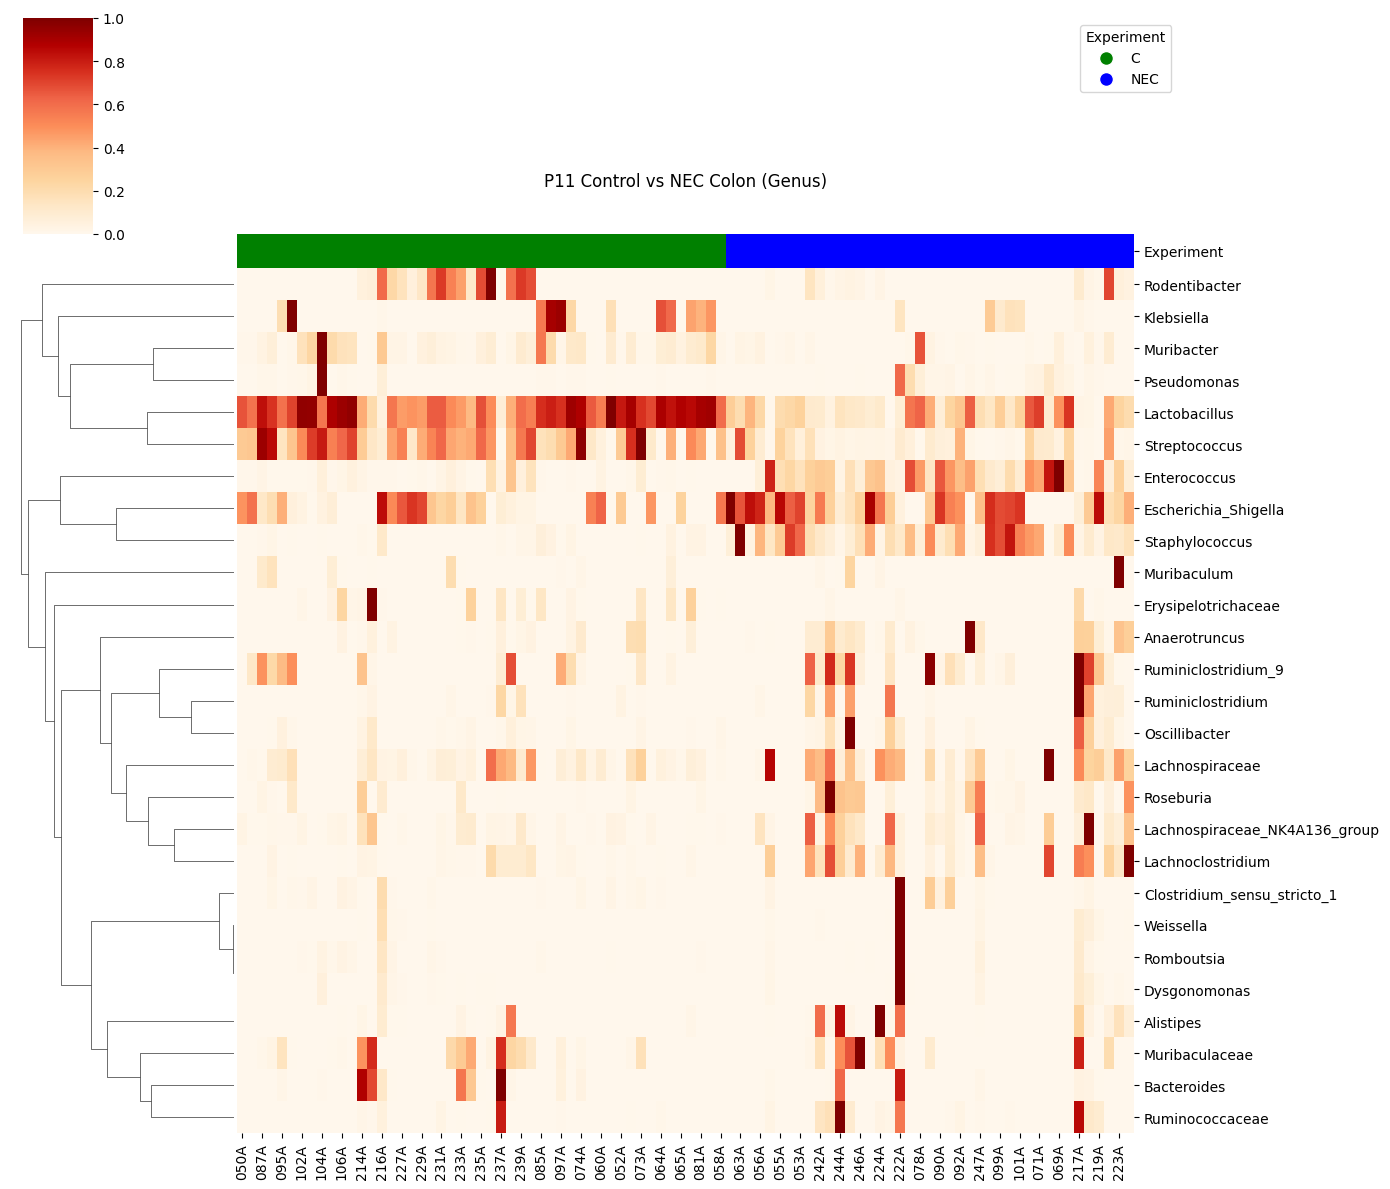

In [74]:
title = "P11 Control vs NEC Colon (Genus)"
# plot_cluster_heatmap(P11_C_NEC_otus_data_heatmap,P11_C_NEC_color_dict,title)
plot_cluster_heatmap(P11_C_NEC_otus_data_heatmap,P11_C_NEC_color_dict,P11_C_NEC_row_colors,title)

## P11_NEC_Non-NEC_TI

### Load datasets

In [75]:
# Load data
P11_C_NEC_otus_data_TI = pd.read_csv('./P11_NEC_Non-NEC/TI/tsv/data_normalized.csv',sep=',',index_col=0)
P11_C_NEC_metadata_TI = pd.read_csv('./P11_NEC_Non-NEC/TI/tsv/NEC_TI.csv',sep=',',index_col=0)
P11_C_NEC_otus_data_TI.head(10)

,050B,051B,052B,053B,054B,055B,056B,057B,058B,059B,...,239B,240B,241B,242B,243B,244B,245B,246B,247B,248B
Lactobacillus,2.894527e+06,4.794247e+05,4.746304e+06,1.178586e+05,4.135038e+05,3.835398e+05,7.391131e+04,1.238514e+05,3.671594e+06,6.947663e+06,...,7.277267e+06,2.299241e+06,1.258490e+05,4.634439e+05,165801.03880,2.317219e+05,2.077507e+05,153815.42150,2.634838e+06,3.755493e+05
Escherichia_Shigella,6.771874e+06,8.419896e+06,4.662405e+06,3.266081e+06,4.622453e+06,5.113863e+05,6.949660e+06,5.025969e+06,5.063923e+06,1.965641e+06,...,1.797843e+04,1.278466e+05,1.140631e+06,5.992809e+04,203755.49340,2.477028e+05,3.076308e+06,521374.35080,8.030364e+05,1.977627e+05
Muribacter,9.188973e+04,0.000000e+00,1.997603e+05,2.796644e+04,2.397123e+04,8.729525e+05,3.935278e+05,1.598082e+05,5.193767e+04,6.272473e+05,...,1.254495e+06,8.030364e+05,0.000000e+00,0.000000e+00,37954.45465,6.991610e+04,5.393528e+04,485417.49900,5.493408e+05,3.276069e+05
Staphylococcus,0.000000e+00,3.795445e+04,0.000000e+00,1.677986e+05,2.592889e+06,1.779864e+06,9.908110e+05,3.795445e+05,1.398322e+04,2.197363e+04,...,2.796644e+04,5.593288e+04,1.258490e+06,1.508190e+06,517379.14500,2.113464e+06,2.087495e+06,685177.78670,7.471035e+05,2.087495e+06
Streptococcus,9.188973e+04,5.393528e+04,2.357171e+05,4.794247e+04,9.988014e+04,6.352377e+05,2.796644e+04,2.816620e+05,6.012785e+05,2.916500e+05,...,2.696764e+05,2.996404e+04,2.097483e+05,1.737915e+05,27966.44027,2.237315e+05,1.458250e+05,0.00000,1.058730e+05,1.957651e+05
Klebsiella,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,8.989213e+04,8.589692e+04,6.991610e+04,135836.99560,2.596884e+04,4.994007e+04,65920.89493,3.196165e+04,7.191370e+04
Enterococcus,0.000000e+00,2.077507e+05,0.000000e+00,4.414702e+05,7.770675e+05,1.118658e+05,4.634439e+05,4.794247e+04,0.000000e+00,0.000000e+00,...,0.000000e+00,5.793048e+04,2.491011e+06,3.915302e+05,163803.43590,7.331203e+05,5.972833e+05,97882.54095,9.268877e+05,3.855374e+05
Pseudomonas,9.788254e+04,5.173791e+05,9.788254e+04,3.449860e+06,7.950459e+05,2.754694e+06,5.693168e+05,2.147423e+06,2.656812e+05,6.392329e+04,...,1.158610e+05,6.771874e+05,3.995206e+05,7.530963e+05,689172.99240,5.633240e+05,5.353576e+05,583300.04000,3.116260e+05,4.554535e+05
Lachnospiraceae_NK4A136_group,0.000000e+00,1.598082e+04,0.000000e+00,0.000000e+00,1.218538e+05,0.000000e+00,2.197363e+04,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,2.996404e+04,3.995206e+04,1.797843e+04,189772.27330,4.994007e+04,2.996404e+04,43947.26328,1.358370e+05,6.592089e+04
Muribaculaceae,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,5.393528e+04,1.797843e+04,4.194966e+04,27966.44027,2.397123e+04,0.000000e+00,23971.23452,1.997603e+03,1.797843e+04


### Sort Metadata File

In [76]:
P11_C_NEC_metadata_TI = sort_meta(P11_C_NEC_metadata_TI)
P11_C_NEC_metadata_TI.head(10)

,Experiment
050B,C
085B,C
086B,C
087B,C
088B,C
095B,C
097B,C
102B,C
103B,C
104B,C


### Build color dictionary

In [77]:
P11_C_NEC_color_dict_TI,P11_C_NEC_row_colors_TI = colordict(P11_C_NEC_metadata_TI)
P11_C_NEC_color_dict_TI

{'C': 'g', 'NEC': 'blue'}

### Build Heatmap Matrix

In [78]:
P11_C_NEC_otus_data_heatmap_TI = create_heatmap(P11_C_NEC_otus_data_TI,P11_C_NEC_metadata_TI)
P11_C_NEC_otus_data_heatmap_TI.head(10)

,050B,085B,086B,087B,088B,095B,097B,102B,103B,104B,...,072B,071B,070B,069B,068B,217B,218B,220B,099B,248B
Lactobacillus,2.894527e+06,6.935677e+06,7.375150e+06,9.125050e+06,8.162205e+06,5.463444e+06,6.835797e+06,6.817819e+06,4.864163e+06,7.878546e+06,...,5.273672e+05,4.093088e+06,1.941670e+06,1.717938e+05,1.038753e+05,529364.76230,2.217339e+05,1.198562e+05,5.513384e+05,3.755493e+05
Escherichia_Shigella,6.771874e+06,3.995206e+03,2.121454e+06,0.000000e+00,9.988014e+03,2.207351e+06,0.000000e+00,7.990412e+03,0.000000e+00,3.455853e+05,...,1.598082e+04,5.992809e+03,2.397123e+04,0.000000e+00,6.991610e+04,113863.36400,1.278466e+05,1.937675e+05,4.914103e+06,1.977627e+05
Muribacter,9.188973e+04,2.712745e+06,5.992809e+04,4.135038e+05,7.331203e+05,4.874151e+05,6.252497e+05,2.586896e+06,3.066320e+06,6.811826e+05,...,6.572113e+05,9.588494e+04,1.638034e+05,8.050340e+05,7.351179e+05,962844.58650,4.854175e+05,1.310427e+06,0.000000e+00,3.276069e+05
Staphylococcus,0.000000e+00,5.193767e+04,1.997603e+03,9.988014e+03,9.988014e+03,2.197363e+04,4.594487e+04,0.000000e+00,0.000000e+00,0.000000e+00,...,1.971634e+06,2.952457e+06,7.071514e+05,4.424690e+06,8.469836e+05,273671.59410,4.832201e+06,1.140631e+06,4.202956e+06,2.087495e+06
Streptococcus,9.188973e+04,2.996404e+04,2.576908e+05,2.177387e+05,7.111466e+05,5.793048e+04,5.393528e+04,1.658010e+05,4.354774e+05,4.314822e+05,...,1.502197e+06,1.658010e+05,1.578106e+05,5.952857e+05,3.355973e+05,115860.96680,1.118658e+05,8.989213e+04,2.397123e+04,1.957651e+05
Klebsiella,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.516181e+06,2.393128e+06,0.000000e+00,1.040751e+06,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,133839.39270,4.394726e+04,7.191370e+04,5.992809e+03,7.191370e+04
Enterococcus,0.000000e+00,0.000000e+00,1.997603e+03,0.000000e+00,0.000000e+00,9.988014e+03,0.000000e+00,0.000000e+00,1.398322e+04,2.457052e+05,...,1.260487e+06,1.186576e+06,5.946864e+06,2.848582e+06,4.646424e+06,69916.10068,1.917699e+05,7.990412e+04,1.997603e+04,3.855374e+05
Pseudomonas,9.788254e+04,9.788254e+04,6.192569e+04,6.592089e+04,1.338394e+05,3.995206e+04,1.598082e+04,2.277267e+05,3.795445e+05,1.598082e+04,...,1.622054e+06,4.115062e+05,5.753096e+05,5.033959e+05,1.823811e+06,383539.75230,2.477028e+05,1.837795e+05,5.393528e+04,4.554535e+05
Lachnospiraceae_NK4A136_group,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.458250e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,59928.08630,0.000000e+00,7.191370e+04,0.000000e+00,6.592089e+04
Muribaculaceae,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,17978.42589,2.197363e+04,3.595685e+04,0.000000e+00,1.797843e+04


/home/xuan/miniconda3/envs/xuan_cuda/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


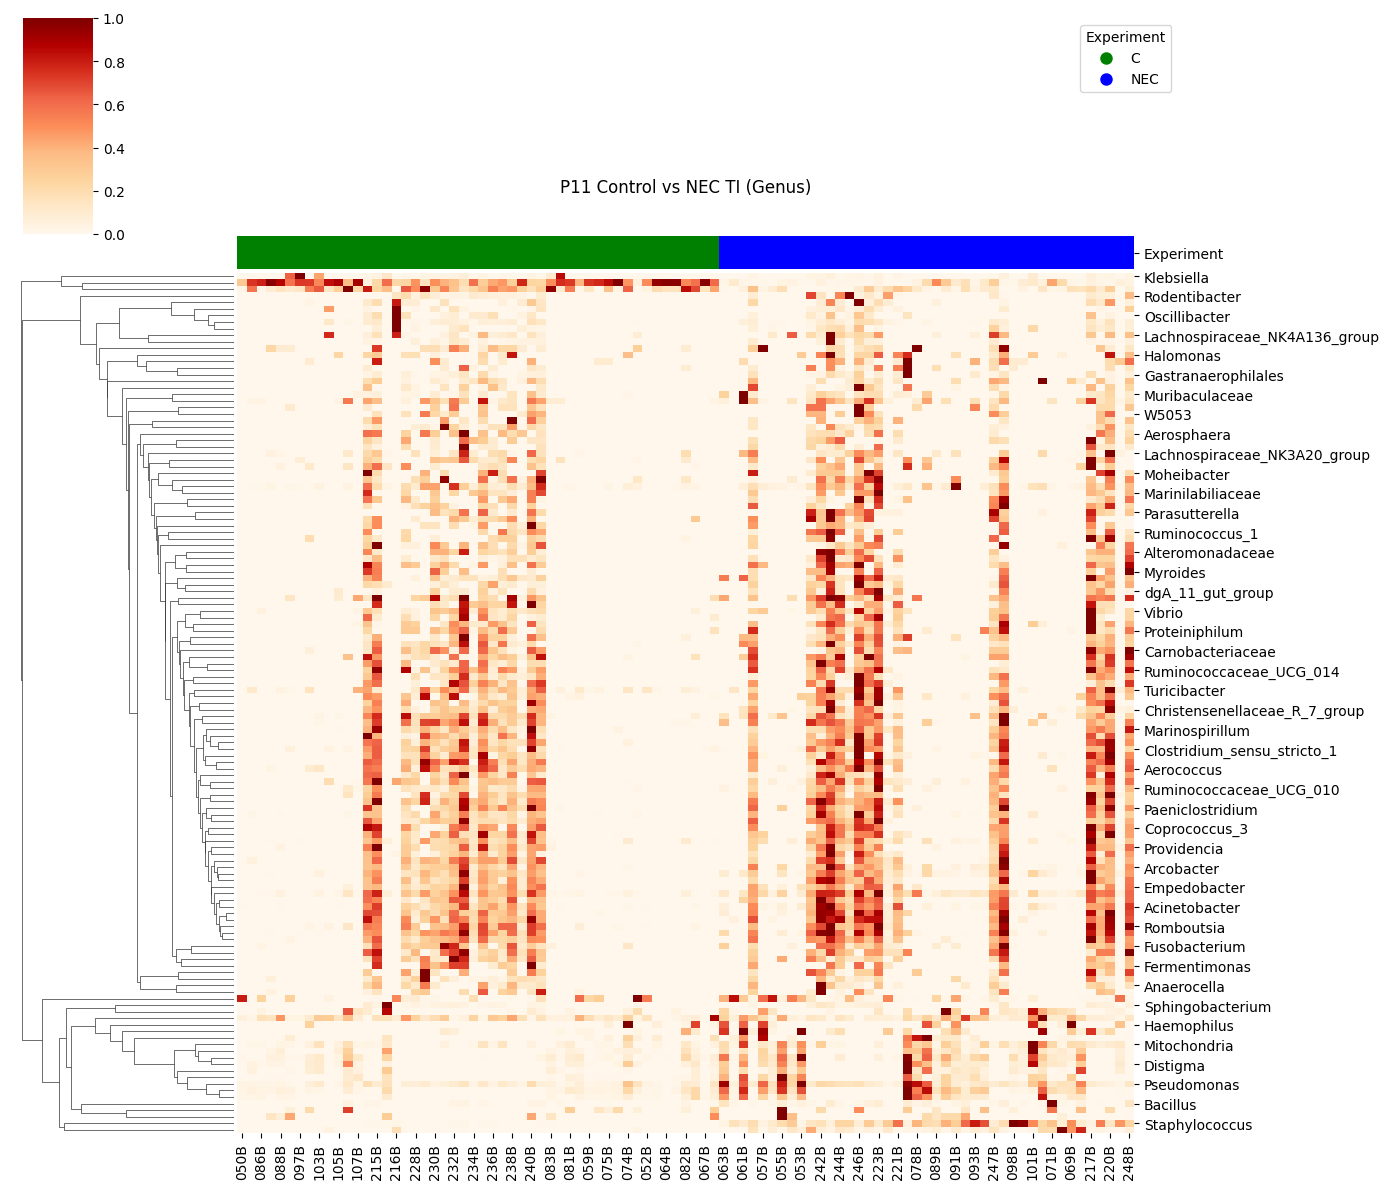

In [79]:
title = "P11 Control vs NEC TI (Genus)"
# plot_cluster_heatmap(P11_C_NEC_otus_data_heatmap,P11_C_NEC_color_dict,title)
plot_cluster_heatmap(P11_C_NEC_otus_data_heatmap_TI,P11_C_NEC_color_dict_TI,P11_C_NEC_row_colors_TI,title)

## P8 CONTROL WT HOMO HET

In [80]:
# Load data
P8_C_gt_otus_data = pd.read_csv('Different_Time_Points/P8/CONTROL_WT_HOMO_HET/TSV/data_normalized.txt',sep='\t',index_col=0)
P8_C_gt_metadata = pd.read_csv('Different_Time_Points/P8/CONTROL_WT_HOMO_HET/TSV/P8_C_H_H.txt',sep='\t',index_col=0)
P8_C_gt_otus_data.head(10)

,1,2,3,7,8,11,13,14,15,22,...,25,30,40,41,42,43,46,47,48,49
Lactobacillus,8.900945e+06,8.575440e+06,8.748320e+06,8.940053e+06,8.764565e+06,6.213674e+06,5.237360e+06,5.450352e+06,5.784481e+06,5.553439e+06,...,6.827781e+06,6.886946e+06,5.275065e+06,7.159905e+06,6.710455e+06,5.290708e+06,5.419266e+06,5.249794e+06,8.040753e+06,7.526123e+06
Escherichia_Shigella,1.363791e+04,1.444014e+04,9.626762e+03,1.562343e+05,1.183290e+04,3.427729e+06,4.378974e+06,4.289124e+06,3.975452e+06,4.078338e+06,...,2.948597e+06,2.859550e+06,4.323419e+06,1.943603e+06,2.960029e+06,4.365937e+06,4.150739e+06,4.366539e+06,5.709873e+05,1.739035e+06
Muribacter,1.648583e+05,1.335713e+05,1.750867e+05,1.353763e+05,2.791761e+05,4.151541e+04,1.540282e+05,4.993883e+04,6.277451e+04,1.333708e+05,...,2.226189e+04,7.420629e+04,3.890816e+04,9.105313e+04,4.893604e+04,3.369367e+04,7.520908e+04,7.741521e+04,3.299172e+05,1.658611e+05
Staphylococcus,1.774934e+05,4.346082e+05,3.457612e+05,2.206133e+03,2.206133e+03,1.664628e+04,4.672991e+04,1.022844e+04,1.203345e+04,5.013939e+03,...,2.807806e+03,0.000000e+00,3.208921e+03,2.607248e+03,3.610036e+03,3.409478e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Streptococcus,5.653717e+05,5.888370e+05,5.298730e+05,5.780069e+05,7.546981e+05,9.747097e+04,7.440685e+04,5.655723e+04,7.139849e+04,1.076994e+05,...,1.109083e+05,1.472092e+05,2.310423e+05,2.807806e+05,1.768918e+05,2.081787e+05,2.246245e+05,2.252261e+05,8.944867e+05,4.113435e+05
Enterococcus,9.827320e+03,2.206133e+03,1.002788e+03,3.610036e+03,3.208921e+03,1.403903e+03,1.203345e+03,1.002788e+03,1.805018e+03,0.000000e+00,...,8.022302e+02,0.000000e+00,1.604460e+03,5.013939e+03,6.217284e+03,1.363791e+04,1.203345e+03,1.805018e+03,1.805018e+03,2.607248e+03
Lachnospiraceae_NK4A136_group,5.214496e+03,1.123122e+04,1.303624e+04,1.203345e+04,1.223401e+04,8.423417e+03,7.420629e+03,1.383847e+04,4.011151e+03,5.615611e+03,...,4.412266e+03,1.403903e+03,7.621187e+03,2.807806e+04,5.214496e+03,6.217284e+03,1.022844e+04,6.016726e+02,1.383847e+04,9.225647e+03
Muribaculaceae,3.028419e+04,5.976615e+04,3.389423e+04,4.552656e+04,3.790538e+04,5.715890e+04,3.670203e+04,2.226189e+04,2.386635e+04,2.186077e+04,...,2.045687e+04,4.211709e+03,3.168809e+04,1.293596e+05,1.865185e+04,2.527025e+04,2.466858e+04,2.286356e+04,4.131486e+04,4.512545e+04
Lachnospiraceae,1.002788e+03,5.214496e+03,2.807806e+03,5.214496e+03,1.805018e+03,2.807806e+03,1.203345e+03,6.016726e+02,2.607248e+03,2.206133e+03,...,0.000000e+00,0.000000e+00,2.406691e+03,1.203345e+04,2.005575e+03,2.807806e+03,3.810593e+03,2.807806e+03,3.208921e+03,1.805018e+03
Bacteroides,7.821744e+03,7.220072e+03,9.426205e+03,6.417842e+03,5.615611e+03,7.821744e+03,3.610036e+03,7.019514e+03,2.206133e+03,6.818957e+03,...,3.008363e+03,0.000000e+00,5.013939e+03,1.383847e+04,2.807806e+03,1.805018e+03,1.203345e+04,4.011151e+03,6.818957e+03,5.013939e+03


In [81]:
def format_meta(metadata,condition ='Experiment'):
    metadata[condition] = metadata[condition].str.rstrip()
    return metadata
P8_C_gt_metadata = format_meta(P8_C_gt_metadata,"Genotype")

In [82]:
P8_C_gt_metadata.head(10)

,Experiment,Tissue type,DOL,Genotype
1,C,colon,DOL8,Sig Homo
2,C,colon,DOL8,Sig WT
3,C,colon,DOL8,Sig Het
7,C,colon,DOL8,Sig Homo
8,C,colon,DOL8,Sig Homo
11,C,colon,DOL8,Sig WT
12,C,colon,DOL8,Sig Het
13,C,colon,DOL8,Sig Homo
14,C,colon,DOL8,Sig Het
15,C,colon,DOL8,Sig Het


In [83]:
def genotypecolordict(metadata,condition ='Experiment'):
    # metadata = metadata.sort_values(condition,ascending=False)
    # metadata[condition] = metadata[condition].str.replace(' ', '')
    color_dict=dict(zip(np.unique(metadata[condition]),np.array(['g','blue','violet'])))
    # print(metadata[condition])
    row_colors = metadata[condition].map(color_dict)
    # print(metadata.index)
    return color_dict,row_colors

In [84]:
def sort_meta_GT(P8_C_F_metadata,condition = "Experiment"):
    new_meta_index = []
    for index1 in P8_C_F_metadata.index:
        new_meta_index.append(str(index1))
    P8_C_F_metadata.index = new_meta_index
    # metadata = P8_C_F_metadata.sort_values(condition,ascending=False)
    # metadata = P8_C_F_metadata.sort_values(condition,ascending=False)
    return P8_C_F_metadata
P8_C_metadata_gt= sort_meta_GT(P8_C_gt_metadata,"Genotype")
P8_C_metadata_gt.head(5)

,Experiment,Tissue type,DOL,Genotype
1,C,colon,DOL8,Sig Homo
2,C,colon,DOL8,Sig WT
3,C,colon,DOL8,Sig Het
7,C,colon,DOL8,Sig Homo
8,C,colon,DOL8,Sig Homo


In [85]:
def create_heatmap(otus_data,metadata,condition ="Experiment" ):
    heatmap = otus_data
    otus_data = otus_data.transpose()
    new_column = []
    new_idx = []
    for index1 in otus_data.index:
        new_idx.append(str(index1).rstrip())
    otus_data.index = new_idx
    # print(new_idx)
    for index1 in otus_data.index:
        for index2 in metadata.index:
            value = metadata.loc[index2, condition]
            if str(index1) == str(index2):
                new_column.append(value)
    # print(new_column)
    otus_data[condition] = new_column
    # print(otus_data[condition])
    otus_data = otus_data.sort_values(by=condition,ascending=False)
    # print(otus_data[condition])
    heatmap = otus_data.drop(columns=[condition])
    heatmap = heatmap.transpose()
    return heatmap
P8_C_otus_data_heatmap = create_heatmap(P8_C_gt_otus_data,P8_C_metadata_gt,"Genotype")
P8_C_otus_data_heatmap.head(5)

,2,46,11,40,22,25,1,47,42,41,...,23,13,8,7,15,14,43,3,48,49
Lactobacillus,8.575440e+06,5.419266e+06,6.213674e+06,5.275065e+06,5.553439e+06,6.827781e+06,8.900945e+06,5.249794e+06,6.710455e+06,7.159905e+06,...,6.614589e+06,5.237360e+06,8.764565e+06,8.940053e+06,5.784481e+06,5.450352e+06,5.290708e+06,8.748320e+06,8.040753e+06,7.526123e+06
Escherichia_Shigella,1.444014e+04,4.150739e+06,3.427729e+06,4.323419e+06,4.078338e+06,2.948597e+06,1.363791e+04,4.366539e+06,2.960029e+06,1.943603e+06,...,3.074547e+06,4.378974e+06,1.183290e+04,1.562343e+05,3.975452e+06,4.289124e+06,4.365937e+06,9.626762e+03,5.709873e+05,1.739035e+06
Muribacter,1.335713e+05,7.520908e+04,4.151541e+04,3.890816e+04,1.333708e+05,2.226189e+04,1.648583e+05,7.741521e+04,4.893604e+04,9.105313e+04,...,4.512545e+04,1.540282e+05,2.791761e+05,1.353763e+05,6.277451e+04,4.993883e+04,3.369367e+04,1.750867e+05,3.299172e+05,1.658611e+05
Staphylococcus,4.346082e+05,0.000000e+00,1.664628e+04,3.208921e+03,5.013939e+03,2.807806e+03,1.774934e+05,0.000000e+00,3.610036e+03,2.607248e+03,...,1.203345e+03,4.672991e+04,2.206133e+03,2.206133e+03,1.203345e+04,1.022844e+04,3.409478e+03,3.457612e+05,0.000000e+00,0.000000e+00
Streptococcus,5.888370e+05,2.246245e+05,9.747097e+04,2.310423e+05,1.076994e+05,1.109083e+05,5.653717e+05,2.252261e+05,1.768918e+05,2.807806e+05,...,1.895269e+05,7.440685e+04,7.546981e+05,5.780069e+05,7.139849e+04,5.655723e+04,2.081787e+05,5.298730e+05,8.944867e+05,4.113435e+05


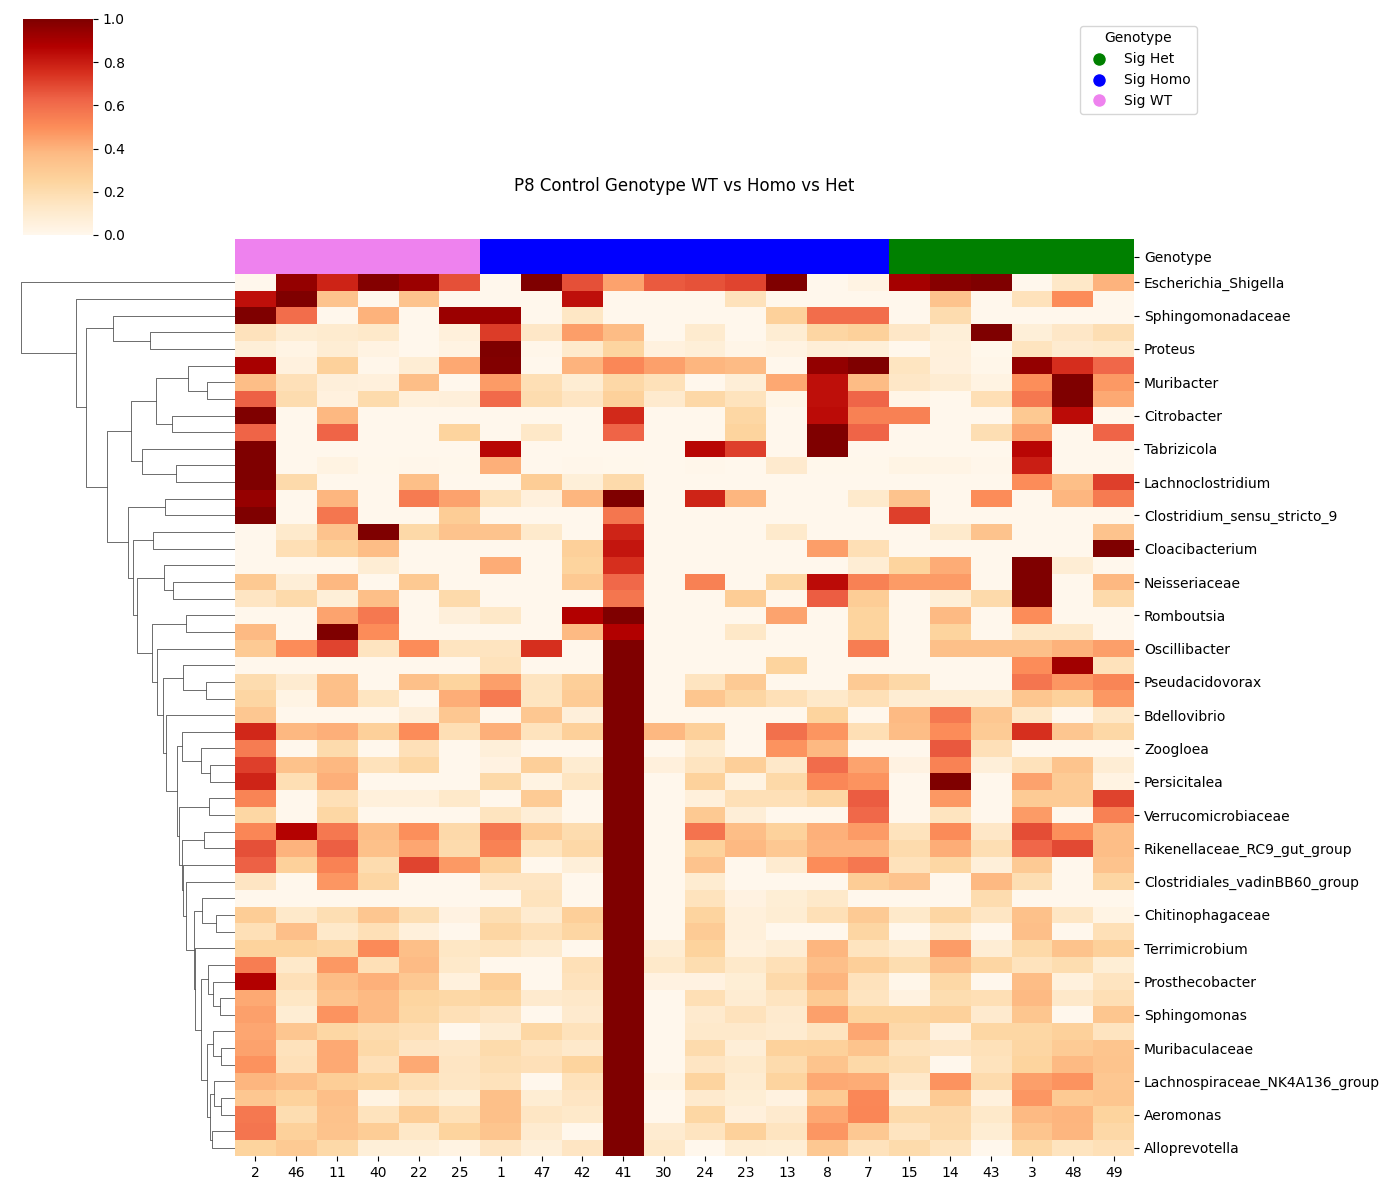

In [86]:
def plot_cluster_heatmap(heatmap,color_dict,row_colors,title):
    # print(row_colors.index)
    custom_cmap = sns.color_palette("OrRd", as_cmap=True)
    hm = sns.clustermap(heatmap,
                metric="correlation",
                standard_scale=0,
                z_score=None,
                col_colors=row_colors,
                col_cluster=False,
                cmap=custom_cmap,
                # cbar_pos=(0, .2, .03, .4),
                figsize=(14, 12))
    # Create a color legend using the color_dict
    legend_labels = [f"{experiment}" for experiment, color in color_dict.items()]
    legend_colors = [color for _, color in color_dict.items()]
    # print(legend_colors)
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels, legend_colors)]
    plt.legend(handles=legend_handles, title="Genotype", bbox_to_anchor=(15, 1), loc='upper left')
    # Add a title to the center of the heatmap
    ax  = hm.ax_heatmap
    ax.text(0.5, 1.1, title, fontsize=12, ha="center", va="center", transform=ax.transAxes)
    # Get the current Axes objects
    ax_row_labels = hm.ax_row_dendrogram
    ax_col_labels = hm.ax_col_dendrogram

    # Set row and column labels font size
    row_font_size = 4
    col_font_size = 4

    for label in ax_row_labels.get_yticklabels():
        label.set_fontsize(row_font_size)

    for label in ax_col_labels.get_xticklabels():
        label.set_fontsize(col_font_size)

    # Display the plot
    plt.show()
title = "P8 Control Genotype WT vs Homo vs Het"
P8_C_color_dict_gt,P8_C_row_colors_gt = genotypecolordict(P8_C_gt_metadata,"Genotype")
plot_cluster_heatmap(P8_C_otus_data_heatmap,P8_C_color_dict_gt,P8_C_row_colors_gt,title)

## P8 CONTROL WT HOMO HET

In [87]:
# Load data
P8_C_gt_hh = pd.read_csv('Different_Time_Points/P8/CONTROL_WT_HOMOHET/TSV/data_normalized.txt',sep='\t',index_col=0)
P8_C_gt_metadata_hh = pd.read_csv('Different_Time_Points/P8/CONTROL_WT_HOMOHET/TSV/P8_C_Het+Homo.txt',sep='\t',index_col=0)
P8_C_gt_hh.head(10)

,1,2,3,7,8,11,13,14,15,22,...,25,30,40,41,42,43,46,47,48,49
Lactobacillus,8.900945e+06,8.575440e+06,8.748320e+06,8.940053e+06,8.764565e+06,6.213674e+06,5.237360e+06,5.450352e+06,5.784481e+06,5.553439e+06,...,6.827781e+06,6.886946e+06,5.275065e+06,7.159905e+06,6.710455e+06,5.290708e+06,5.419266e+06,5.249794e+06,8.040753e+06,7.526123e+06
Escherichia_Shigella,1.363791e+04,1.444014e+04,9.626762e+03,1.562343e+05,1.183290e+04,3.427729e+06,4.378974e+06,4.289124e+06,3.975452e+06,4.078338e+06,...,2.948597e+06,2.859550e+06,4.323419e+06,1.943603e+06,2.960029e+06,4.365937e+06,4.150739e+06,4.366539e+06,5.709873e+05,1.739035e+06
Muribacter,1.648583e+05,1.335713e+05,1.750867e+05,1.353763e+05,2.791761e+05,4.151541e+04,1.540282e+05,4.993883e+04,6.277451e+04,1.333708e+05,...,2.226189e+04,7.420629e+04,3.890816e+04,9.105313e+04,4.893604e+04,3.369367e+04,7.520908e+04,7.741521e+04,3.299172e+05,1.658611e+05
Staphylococcus,1.774934e+05,4.346082e+05,3.457612e+05,2.206133e+03,2.206133e+03,1.664628e+04,4.672991e+04,1.022844e+04,1.203345e+04,5.013939e+03,...,2.807806e+03,0.000000e+00,3.208921e+03,2.607248e+03,3.610036e+03,3.409478e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Streptococcus,5.653717e+05,5.888370e+05,5.298730e+05,5.780069e+05,7.546981e+05,9.747097e+04,7.440685e+04,5.655723e+04,7.139849e+04,1.076994e+05,...,1.109083e+05,1.472092e+05,2.310423e+05,2.807806e+05,1.768918e+05,2.081787e+05,2.246245e+05,2.252261e+05,8.944867e+05,4.113435e+05
Enterococcus,9.827320e+03,2.206133e+03,1.002788e+03,3.610036e+03,3.208921e+03,1.403903e+03,1.203345e+03,1.002788e+03,1.805018e+03,0.000000e+00,...,8.022302e+02,0.000000e+00,1.604460e+03,5.013939e+03,6.217284e+03,1.363791e+04,1.203345e+03,1.805018e+03,1.805018e+03,2.607248e+03
Lachnospiraceae_NK4A136_group,5.214496e+03,1.123122e+04,1.303624e+04,1.203345e+04,1.223401e+04,8.423417e+03,7.420629e+03,1.383847e+04,4.011151e+03,5.615611e+03,...,4.412266e+03,1.403903e+03,7.621187e+03,2.807806e+04,5.214496e+03,6.217284e+03,1.022844e+04,6.016726e+02,1.383847e+04,9.225647e+03
Muribaculaceae,3.028419e+04,5.976615e+04,3.389423e+04,4.552656e+04,3.790538e+04,5.715890e+04,3.670203e+04,2.226189e+04,2.386635e+04,2.186077e+04,...,2.045687e+04,4.211709e+03,3.168809e+04,1.293596e+05,1.865185e+04,2.527025e+04,2.466858e+04,2.286356e+04,4.131486e+04,4.512545e+04
Lachnospiraceae,1.002788e+03,5.214496e+03,2.807806e+03,5.214496e+03,1.805018e+03,2.807806e+03,1.203345e+03,6.016726e+02,2.607248e+03,2.206133e+03,...,0.000000e+00,0.000000e+00,2.406691e+03,1.203345e+04,2.005575e+03,2.807806e+03,3.810593e+03,2.807806e+03,3.208921e+03,1.805018e+03
Bacteroides,7.821744e+03,7.220072e+03,9.426205e+03,6.417842e+03,5.615611e+03,7.821744e+03,3.610036e+03,7.019514e+03,2.206133e+03,6.818957e+03,...,3.008363e+03,0.000000e+00,5.013939e+03,1.383847e+04,2.807806e+03,1.805018e+03,1.203345e+04,4.011151e+03,6.818957e+03,5.013939e+03


In [88]:
P8_C_gt_metadata_hh = format_meta(P8_C_gt_metadata_hh,"Genotype")

In [89]:
P8_C_metadata_gt_hh= sort_meta_GT(P8_C_gt_metadata_hh,"Genotype")
P8_C_metadata_gt_hh.head(5)

,Experiment,Tissue type,DOL,Genotype
1,C,colon,DOL8,Sig Homo_HET
2,C,colon,DOL8,Sig WT
3,C,colon,DOL8,Sig Homo_HET
7,C,colon,DOL8,Sig Homo_HET
8,C,colon,DOL8,Sig Homo_HET


In [90]:
P8_C_hh_data_heatmap = create_heatmap(P8_C_gt_otus_data,P8_C_metadata_gt,"Genotype")
P8_C_hh_data_heatmap.head(5)

,2,46,11,40,22,25,1,47,42,41,...,23,13,8,7,15,14,43,3,48,49
Lactobacillus,8.575440e+06,5.419266e+06,6.213674e+06,5.275065e+06,5.553439e+06,6.827781e+06,8.900945e+06,5.249794e+06,6.710455e+06,7.159905e+06,...,6.614589e+06,5.237360e+06,8.764565e+06,8.940053e+06,5.784481e+06,5.450352e+06,5.290708e+06,8.748320e+06,8.040753e+06,7.526123e+06
Escherichia_Shigella,1.444014e+04,4.150739e+06,3.427729e+06,4.323419e+06,4.078338e+06,2.948597e+06,1.363791e+04,4.366539e+06,2.960029e+06,1.943603e+06,...,3.074547e+06,4.378974e+06,1.183290e+04,1.562343e+05,3.975452e+06,4.289124e+06,4.365937e+06,9.626762e+03,5.709873e+05,1.739035e+06
Muribacter,1.335713e+05,7.520908e+04,4.151541e+04,3.890816e+04,1.333708e+05,2.226189e+04,1.648583e+05,7.741521e+04,4.893604e+04,9.105313e+04,...,4.512545e+04,1.540282e+05,2.791761e+05,1.353763e+05,6.277451e+04,4.993883e+04,3.369367e+04,1.750867e+05,3.299172e+05,1.658611e+05
Staphylococcus,4.346082e+05,0.000000e+00,1.664628e+04,3.208921e+03,5.013939e+03,2.807806e+03,1.774934e+05,0.000000e+00,3.610036e+03,2.607248e+03,...,1.203345e+03,4.672991e+04,2.206133e+03,2.206133e+03,1.203345e+04,1.022844e+04,3.409478e+03,3.457612e+05,0.000000e+00,0.000000e+00
Streptococcus,5.888370e+05,2.246245e+05,9.747097e+04,2.310423e+05,1.076994e+05,1.109083e+05,5.653717e+05,2.252261e+05,1.768918e+05,2.807806e+05,...,1.895269e+05,7.440685e+04,7.546981e+05,5.780069e+05,7.139849e+04,5.655723e+04,2.081787e+05,5.298730e+05,8.944867e+05,4.113435e+05


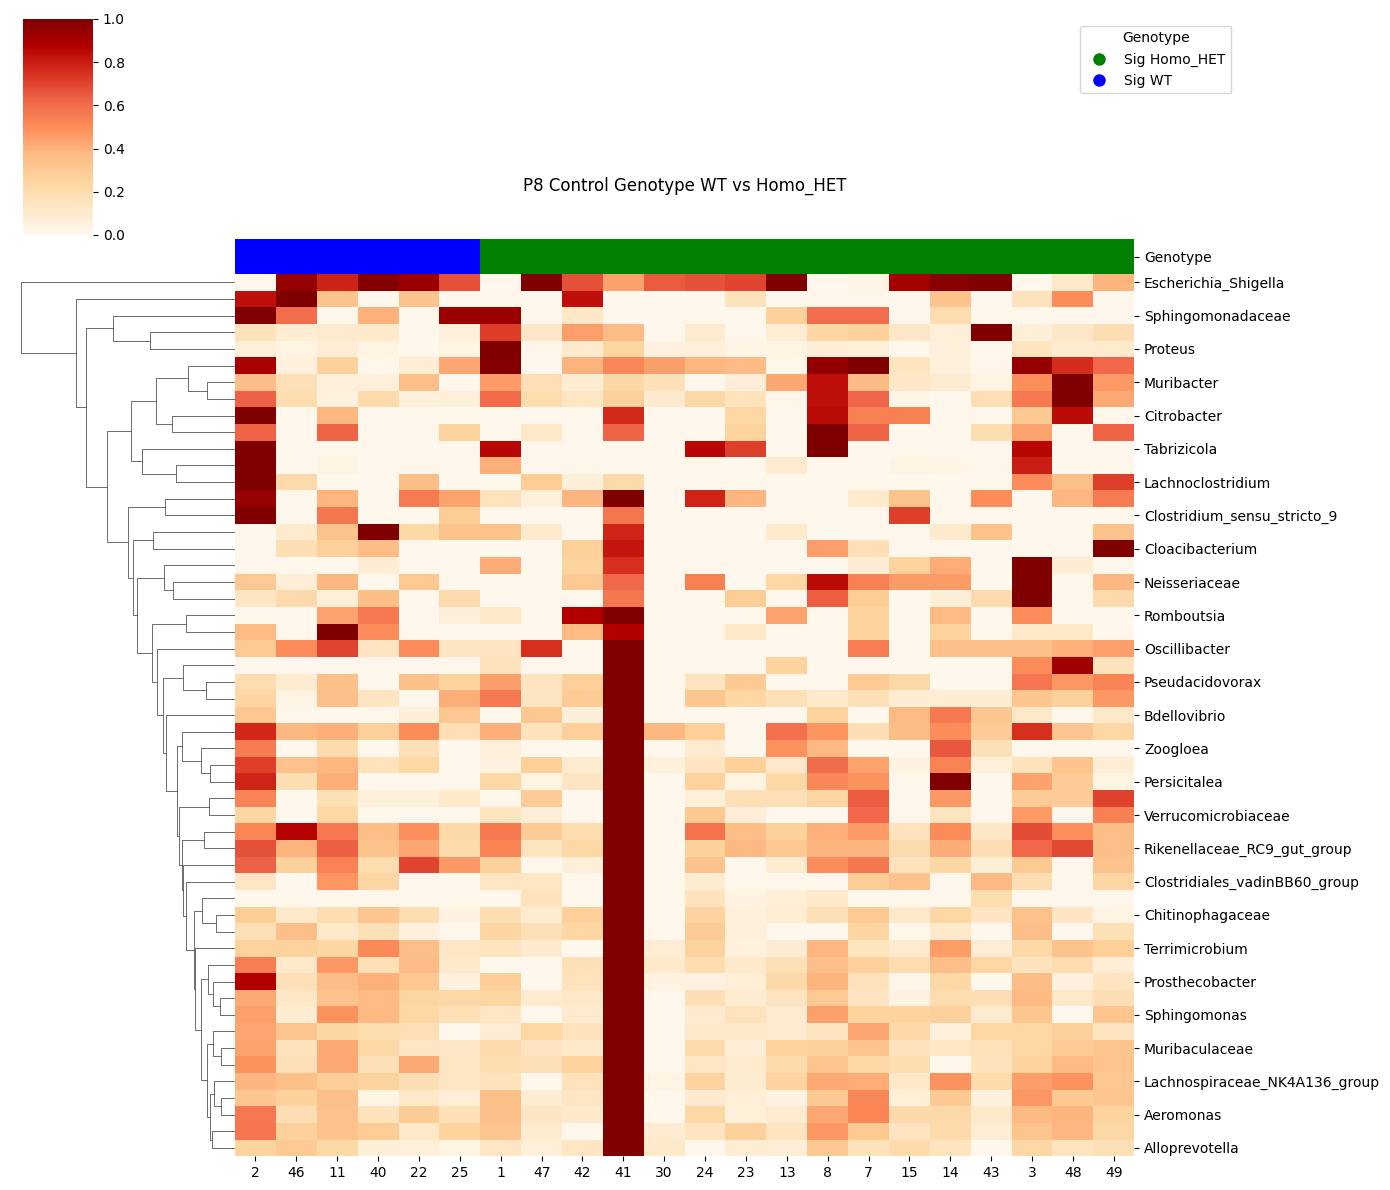

In [91]:
title = "P8 Control Genotype WT vs Homo_HET"
P8_C_color_dict_gt_hh,P8_C_row_colors_gt_hh = genotypecolordict(P8_C_metadata_gt_hh,"Genotype")
plot_cluster_heatmap(P8_C_hh_data_heatmap,P8_C_color_dict_gt_hh,P8_C_row_colors_gt_hh,title)

## P8 Feeding WT HOMO HET

In [92]:
# Load data
P8_F_gt_h_h = pd.read_csv('Different_Time_Points/P8/FEEDING_WT_HOMO_HET/TSV/data_normalized.txt',sep='\t',index_col=0)
P8_F_gt_metadata_h_h = pd.read_csv('Different_Time_Points/P8/FEEDING_WT_HOMO_HET/TSV/P8_F_H_H.txt',sep='\t',index_col=0)
P8_F_gt_h_h.head(10)

,4,5,6,9,10,16,17,18,19,20,...,32,33,34,35,36,37,38,39,44,45
Lactobacillus,2.757596e+05,7.052214e+05,2.520262e+05,1.469857e+06,5.145468e+05,4.352740e+05,1.942265e+05,1.465013e+06,5.038910e+05,3.233556e+06,...,2.221576e+06,5.631438e+05,8.363202e+04,4.975136e+06,5.505667e+06,4.188059e+05,7.666538e+06,7.145210e+06,3.528206e+06,7.570474e+05
Escherichia_Shigella,8.785398e+06,7.533017e+06,7.648132e+06,7.174271e+06,7.895476e+06,9.028545e+06,8.464594e+06,8.180116e+06,8.602958e+06,5.924634e+06,...,7.336046e+06,8.683038e+06,8.799445e+06,2.421777e+04,1.291614e+04,1.002616e+05,1.501502e+04,1.727534e+04,5.471116e+06,8.344796e+06
Muribacter,7.265330e+03,2.723691e+05,8.347057e+04,5.392489e+04,2.216733e+05,1.372340e+04,1.291614e+04,1.227033e+04,3.180600e+04,5.973716e+03,...,1.517647e+04,4.843553e+03,2.906132e+04,2.269528e+06,9.530498e+05,5.574607e+06,4.084730e+04,6.120637e+05,1.356195e+04,1.888986e+04
Staphylococcus,1.414318e+05,8.761988e+05,7.265330e+04,7.593077e+05,1.004069e+06,8.411637e+04,6.813265e+04,1.248022e+05,1.906745e+05,1.018761e+05,...,1.937421e+03,5.005005e+03,0.000000e+00,3.137008e+05,1.653751e+06,1.076883e+05,7.234654e+05,1.888986e+05,2.599374e+04,1.243179e+04
Streptococcus,6.780975e+03,5.553941e+04,2.502503e+04,2.437922e+04,8.944428e+04,1.033291e+04,2.437922e+04,2.550938e+04,2.599374e+04,2.276470e+04,...,8.718396e+03,1.146308e+04,8.072589e+02,4.903290e+05,6.445155e+05,4.294617e+04,1.438535e+05,4.062127e+05,1.855081e+05,7.555943e+04
Enterococcus,1.388485e+04,5.489360e+03,3.600375e+04,1.178598e+04,8.556944e+03,5.166457e+03,1.210888e+04,2.906132e+03,6.619523e+03,4.197746e+03,...,4.682101e+03,7.265330e+03,1.775970e+04,3.342052e+04,1.372340e+04,3.923278e+04,2.357196e+04,2.405631e+04,8.072589e+03,1.049437e+04
Pseudomonas,0.000000e+00,0.000000e+00,1.453066e+03,0.000000e+00,4.843553e+02,0.000000e+00,1.453066e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,3.229035e+02,3.229035e+03,0.000000e+00,4.359198e+03,1.291614e+03,3.229035e+03,2.260325e+03,0.000000e+00,1.614518e+03,4.843553e+02
Lachnospiraceae_NK4A136_group,4.262327e+04,2.776971e+04,1.076883e+05,3.212890e+04,1.291614e+04,2.179599e+04,6.215893e+04,9.364203e+03,2.954567e+04,4.343053e+04,...,1.840550e+04,3.487358e+04,5.666957e+04,9.574090e+04,6.054442e+04,1.993929e+05,7.055443e+04,7.507508e+04,4.100875e+04,4.601376e+04
Muribaculaceae,1.879299e+05,1.356195e+05,4.259098e+05,1.407859e+05,6.684103e+04,9.477219e+04,2.881914e+05,4.601376e+04,1.396558e+05,1.587071e+05,...,8.702251e+04,1.779199e+05,2.973942e+05,4.654655e+05,2.161839e+05,7.723853e+05,3.153153e+05,4.063741e+05,1.948723e+05,1.829249e+05
Lachnospiraceae,1.953566e+04,8.234040e+03,4.795118e+04,9.687106e+03,2.583228e+03,9.848558e+03,3.777972e+04,2.260325e+03,1.888986e+04,1.566082e+04,...,8.718396e+03,2.098873e+04,3.358197e+04,4.730537e+04,2.825406e+04,1.273854e+05,3.745681e+04,4.536795e+04,2.034292e+04,2.615519e+04


In [93]:
P8_F_gt_metadata_h_h = format_meta(P8_F_gt_metadata_h_h,"Genotype")

In [94]:
P8_F_gt_metadata_h_h.head(5)

,Experiment,Tissue type,DOL,Genotype
4,F,colon,DOL8,Sig Homo
5,F,colon,DOL8,Sig WT
6,F,colon,DOL8,Sig HET
9,F,colon,DOL8,Sig HET
10,F,colon,DOL8,Sig WT


In [95]:
P8_F_metadata_gt_h_h= sort_meta_GT(P8_F_gt_metadata_h_h,"Genotype")
P8_F_metadata_gt_h_h.head(5)

,Experiment,Tissue type,DOL,Genotype
4,F,colon,DOL8,Sig Homo
5,F,colon,DOL8,Sig WT
6,F,colon,DOL8,Sig HET
9,F,colon,DOL8,Sig HET
10,F,colon,DOL8,Sig WT


In [96]:
P8_F_h_h_data_heatmap = create_heatmap(P8_F_gt_h_h,P8_F_metadata_gt_h_h,"Genotype")
P8_F_h_h_data_heatmap.head(5)

,27,44,39,10,36,18,32,20,5,4,...,31,19,33,34,35,17,38,9,6,28
Lactobacillus,3.677871e+05,3.528206e+06,7.145210e+06,5.145468e+05,5.505667e+06,1.465013e+06,2.221576e+06,3.233556e+06,7.052214e+05,2.757596e+05,...,4.552940e+04,5.038910e+05,5.631438e+05,8.363202e+04,4.975136e+06,1.942265e+05,7.666538e+06,1.469857e+06,2.520262e+05,1.468888e+06
Escherichia_Shigella,8.919403e+06,5.471116e+06,1.727534e+04,7.895476e+06,1.291614e+04,8.180116e+06,7.336046e+06,5.924634e+06,7.533017e+06,8.785398e+06,...,9.122510e+06,8.602958e+06,8.683038e+06,8.799445e+06,2.421777e+04,8.464594e+06,1.501502e+04,7.174271e+06,7.648132e+06,7.740644e+06
Muribacter,1.905131e+04,1.356195e+04,6.120637e+05,2.216733e+05,9.530498e+05,1.227033e+04,1.517647e+04,5.973716e+03,2.723691e+05,7.265330e+03,...,5.327909e+03,3.180600e+04,4.843553e+03,2.906132e+04,2.269528e+06,1.291614e+04,4.084730e+04,5.392489e+04,8.347057e+04,1.614518e+03
Staphylococcus,1.650037e+05,2.599374e+04,1.888986e+05,1.004069e+06,1.653751e+06,1.248022e+05,1.937421e+03,1.018761e+05,8.761988e+05,1.414318e+05,...,1.775970e+03,1.906745e+05,5.005005e+03,0.000000e+00,3.137008e+05,6.813265e+04,7.234654e+05,7.593077e+05,7.265330e+04,1.559624e+05
Streptococcus,1.727534e+04,1.855081e+05,4.062127e+05,8.944428e+04,6.445155e+05,2.550938e+04,8.718396e+03,2.276470e+04,5.553941e+04,6.780975e+03,...,0.000000e+00,2.599374e+04,1.146308e+04,8.072589e+02,4.903290e+05,2.437922e+04,1.438535e+05,2.437922e+04,2.502503e+04,2.034292e+04


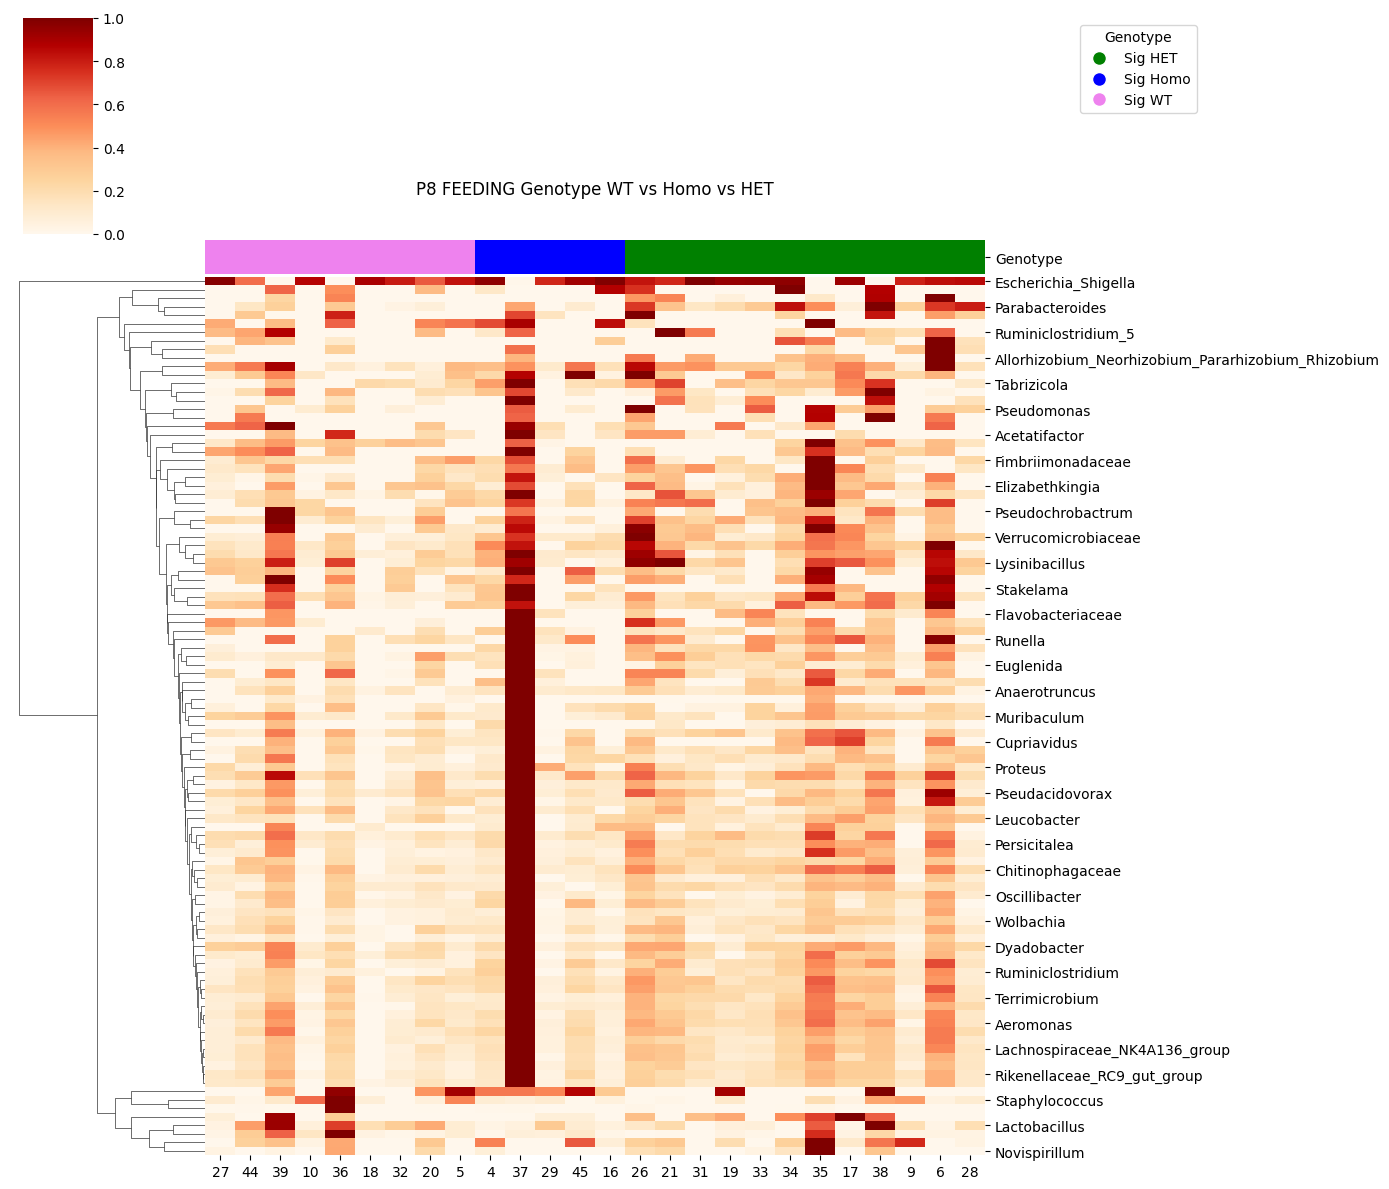

In [97]:
title = "P8 FEEDING Genotype WT vs Homo vs HET"
P8_F_color_dict_gt_h_h,P8_F_row_colors_gt_h_h = genotypecolordict(P8_F_metadata_gt_h_h,"Genotype")
plot_cluster_heatmap(P8_F_h_h_data_heatmap,P8_F_color_dict_gt_h_h,P8_F_row_colors_gt_h_h,title)

## P8 Feeding WT HOMOHET

In [98]:
# Load data
P8_F_gt_hh = pd.read_csv('Different_Time_Points/P8/FEEDING_WT_HOMOHET/TSV/data_normalized.txt',sep='\t',index_col=0)
P8_F_gt_metadata_hh = pd.read_csv('Different_Time_Points/P8/FEEDING_WT_HOMOHET/TSV/P8_F_Het+Homo.txt',sep='\t',index_col=0)
P8_F_gt_hh.head(5)

,4,5,6,9,10,16,17,18,19,20,...,32,33,34,35,36,37,38,39,44,45
Lactobacillus,2.757596e+05,7.052214e+05,2.520262e+05,1.469857e+06,5.145468e+05,4.352740e+05,1.942265e+05,1.465013e+06,5.038910e+05,3.233556e+06,...,2.221576e+06,5.631438e+05,8.363202e+04,4.975136e+06,5.505667e+06,4.188059e+05,7.666538e+06,7.145210e+06,3.528206e+06,7.570474e+05
Escherichia_Shigella,8.785398e+06,7.533017e+06,7.648132e+06,7.174271e+06,7.895476e+06,9.028545e+06,8.464594e+06,8.180116e+06,8.602958e+06,5.924634e+06,...,7.336046e+06,8.683038e+06,8.799445e+06,2.421777e+04,1.291614e+04,1.002616e+05,1.501502e+04,1.727534e+04,5.471116e+06,8.344796e+06
Muribacter,7.265330e+03,2.723691e+05,8.347057e+04,5.392489e+04,2.216733e+05,1.372340e+04,1.291614e+04,1.227033e+04,3.180600e+04,5.973716e+03,...,1.517647e+04,4.843553e+03,2.906132e+04,2.269528e+06,9.530498e+05,5.574607e+06,4.084730e+04,6.120637e+05,1.356195e+04,1.888986e+04
Staphylococcus,1.414318e+05,8.761988e+05,7.265330e+04,7.593077e+05,1.004069e+06,8.411637e+04,6.813265e+04,1.248022e+05,1.906745e+05,1.018761e+05,...,1.937421e+03,5.005005e+03,0.000000e+00,3.137008e+05,1.653751e+06,1.076883e+05,7.234654e+05,1.888986e+05,2.599374e+04,1.243179e+04
Streptococcus,6.780975e+03,5.553941e+04,2.502503e+04,2.437922e+04,8.944428e+04,1.033291e+04,2.437922e+04,2.550938e+04,2.599374e+04,2.276470e+04,...,8.718396e+03,1.146308e+04,8.072589e+02,4.903290e+05,6.445155e+05,4.294617e+04,1.438535e+05,4.062127e+05,1.855081e+05,7.555943e+04


In [99]:
P8_F_gt_metadata_hh = format_meta(P8_F_gt_metadata_hh,"Genotype")
P8_F_gt_metadata_hh.head(5)

,Experiment,Tissue type,DOL,Genotype
4,F,colon,DOL8,Sig Homo_HET
5,F,colon,DOL8,Sig WT
6,F,colon,DOL8,Sig Homo_HET
9,F,colon,DOL8,Sig Homo_HET
10,F,colon,DOL8,Sig WT


In [100]:
P8_F_gt_metadata_hh= sort_meta_GT(P8_F_gt_metadata_hh,"Genotype")
P8_F_gt_metadata_hh.head(5)

,Experiment,Tissue type,DOL,Genotype
4,F,colon,DOL8,Sig Homo_HET
5,F,colon,DOL8,Sig WT
6,F,colon,DOL8,Sig Homo_HET
9,F,colon,DOL8,Sig Homo_HET
10,F,colon,DOL8,Sig WT


In [101]:
P8_F_hh_data_heatmap = create_heatmap(P8_F_gt_hh,P8_F_gt_metadata_hh,"Genotype")
P8_F_hh_data_heatmap.head(5)

,32,44,39,10,18,36,20,27,5,4,...,31,29,26,21,19,17,16,9,6,45
Lactobacillus,2.221576e+06,3.528206e+06,7.145210e+06,5.145468e+05,1.465013e+06,5.505667e+06,3.233556e+06,3.677871e+05,7.052214e+05,2.757596e+05,...,4.552940e+04,2.356066e+06,9.685492e+05,1.649714e+06,5.038910e+05,1.942265e+05,4.352740e+05,1.469857e+06,2.520262e+05,7.570474e+05
Escherichia_Shigella,7.336046e+06,5.471116e+06,1.727534e+04,7.895476e+06,8.180116e+06,1.291614e+04,5.924634e+06,8.919403e+06,7.533017e+06,8.785398e+06,...,9.122510e+06,7.086280e+06,7.507508e+06,7.093868e+06,8.602958e+06,8.464594e+06,9.028545e+06,7.174271e+06,7.648132e+06,8.344796e+06
Muribacter,1.517647e+04,1.356195e+04,6.120637e+05,2.216733e+05,1.227033e+04,9.530498e+05,5.973716e+03,1.905131e+04,2.723691e+05,7.265330e+03,...,5.327909e+03,5.489360e+03,1.130162e+03,4.020149e+04,3.180600e+04,1.291614e+04,1.372340e+04,5.392489e+04,8.347057e+04,1.888986e+04
Staphylococcus,1.937421e+03,2.599374e+04,1.888986e+05,1.004069e+06,1.248022e+05,1.653751e+06,1.018761e+05,1.650037e+05,8.761988e+05,1.414318e+05,...,1.775970e+03,1.630663e+05,1.243179e+04,2.986858e+04,1.906745e+05,6.813265e+04,8.411637e+04,7.593077e+05,7.265330e+04,1.243179e+04
Streptococcus,8.718396e+03,1.855081e+05,4.062127e+05,8.944428e+04,2.550938e+04,6.445155e+05,2.276470e+04,1.727534e+04,5.553941e+04,6.780975e+03,...,0.000000e+00,4.004004e+04,1.291614e+03,5.327909e+03,2.599374e+04,2.437922e+04,1.033291e+04,2.437922e+04,2.502503e+04,7.555943e+04


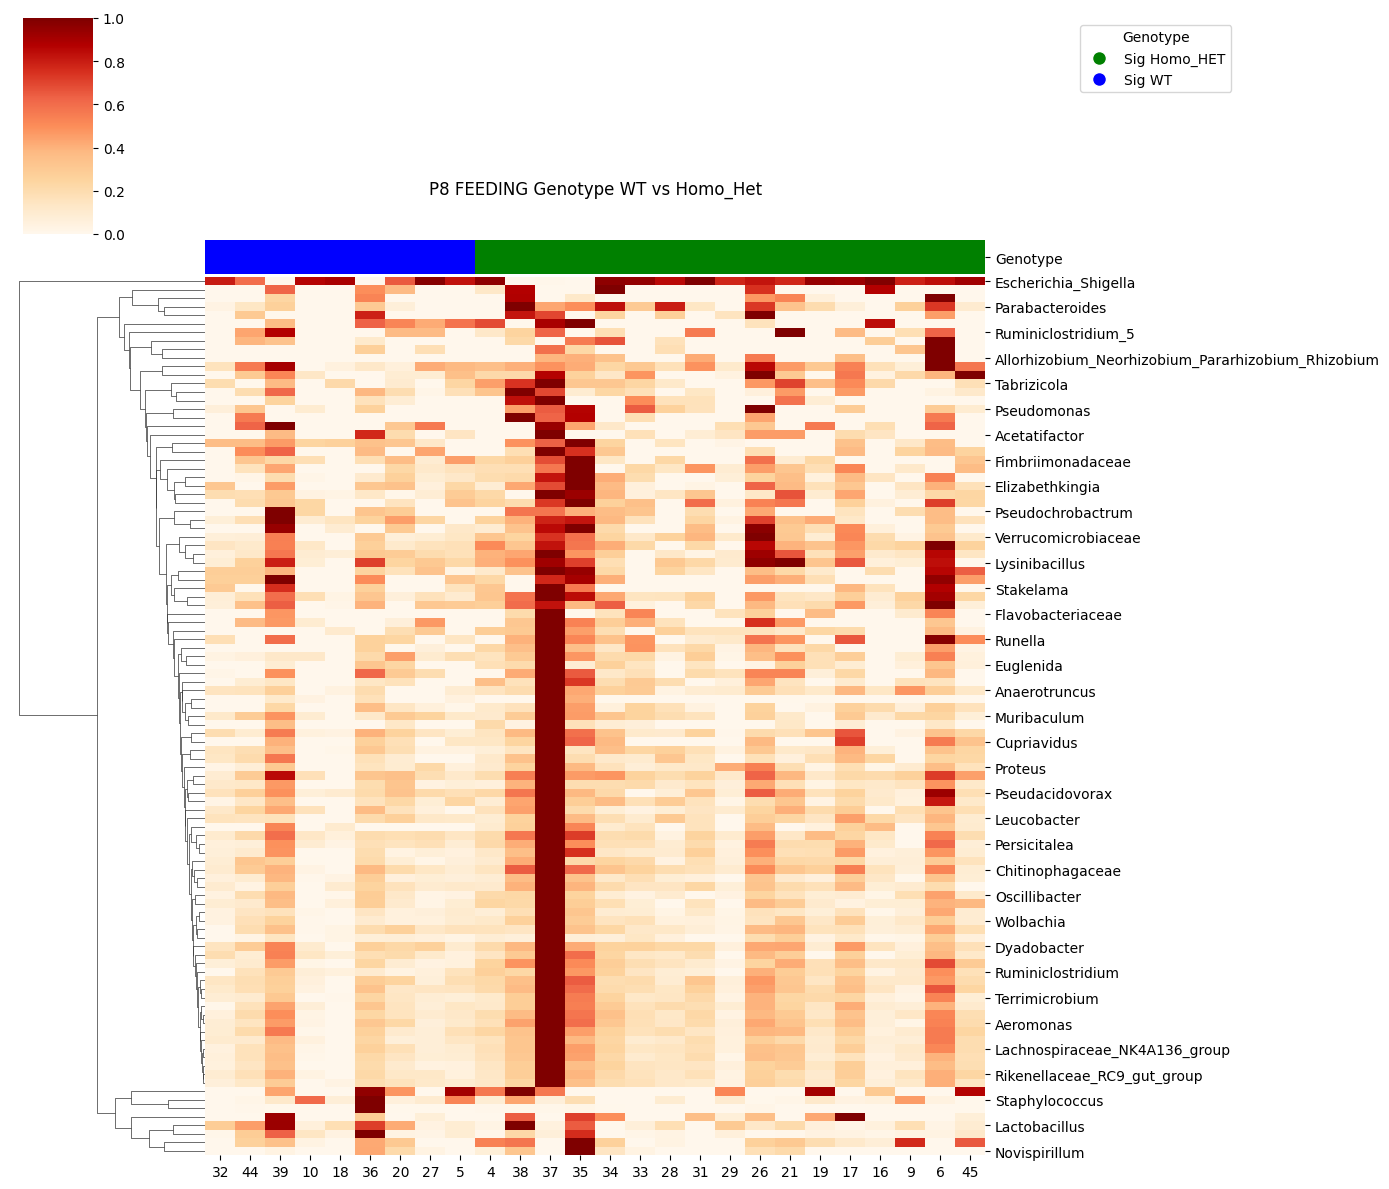

In [102]:

title = "P8 FEEDING Genotype WT vs Homo_Het"
P8_F_color_dict_gt_hh,P8_F_row_colors_gt_hh = genotypecolordict(P8_F_gt_metadata_hh,"Genotype")
# print(P8_F_row_colors_gt_hh)
plot_cluster_heatmap(P8_F_hh_data_heatmap,P8_F_color_dict_gt_hh,P8_F_row_colors_gt_hh,title)

## P11 COLON WT HOMO HET CONTROL

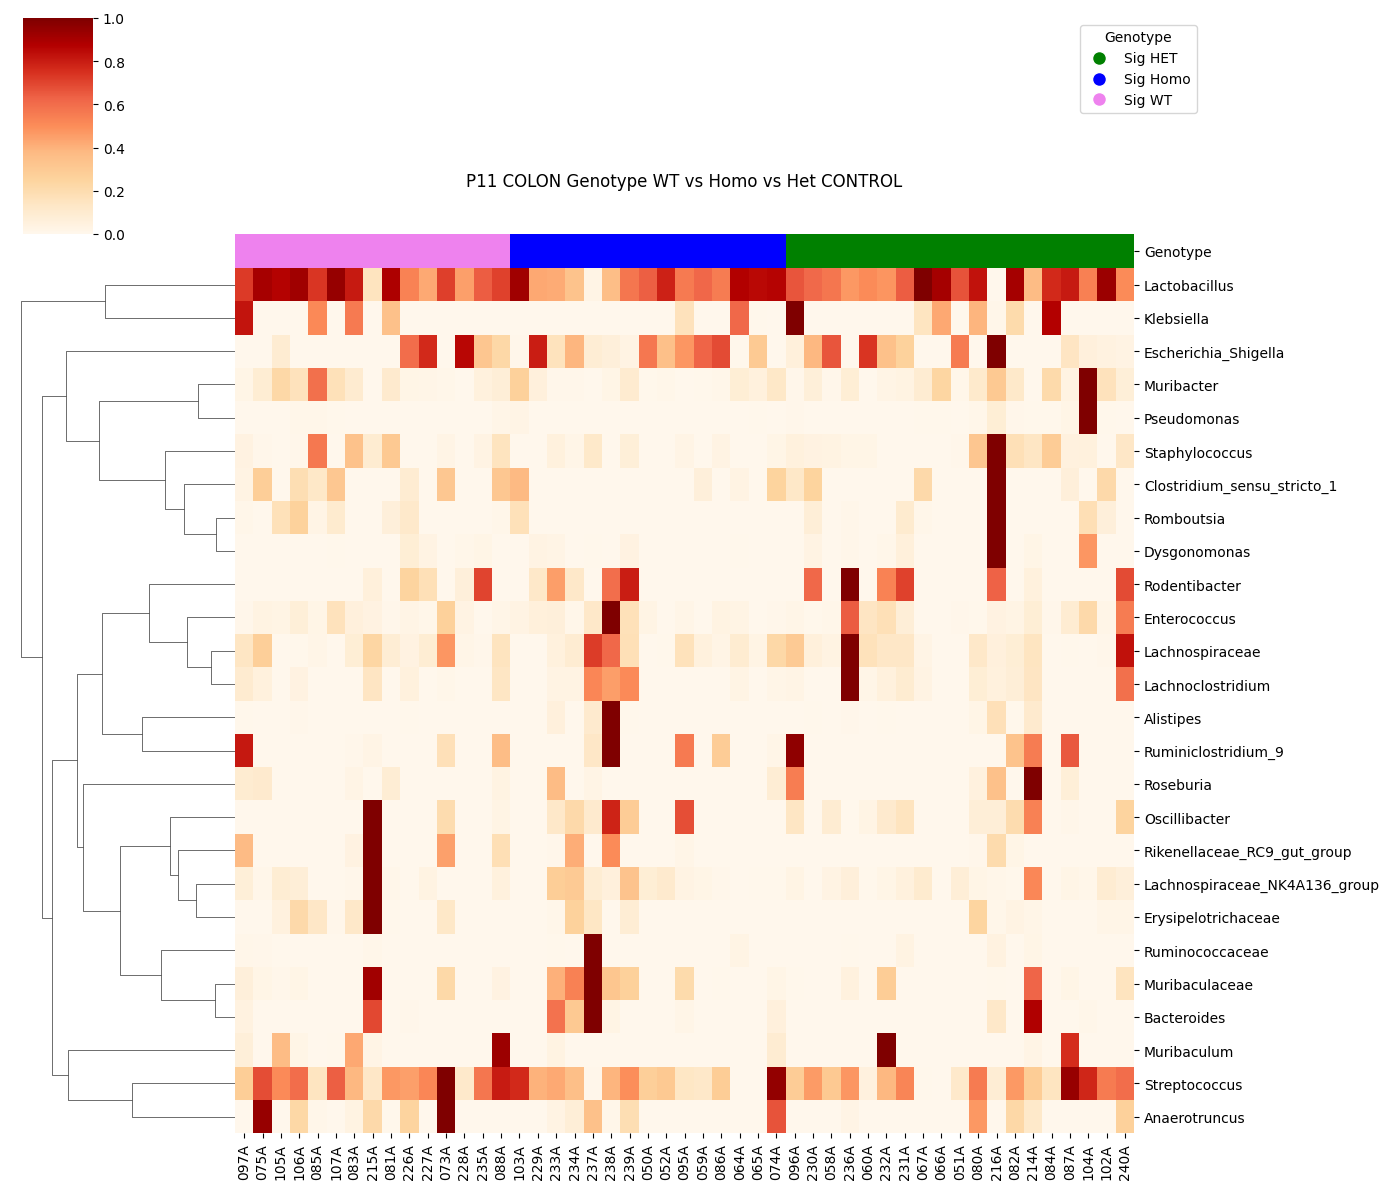

In [103]:
# Load data
P11_c_gt_h_h = pd.read_csv('Different_Time_Points/P11_COLON_WT_Homo_HET/CONTROL/TSV/data_normalized.txt',sep='\t',index_col=0)
P11_c_gt_metadata_h_h = pd.read_csv('Different_Time_Points/P11_COLON_WT_Homo_HET/CONTROL/TSV/P11_COLON_WT_Homo_HET_C.txt',sep='\t',index_col=0)
P11_c_gt_metadata_h_h = format_meta(P11_c_gt_metadata_h_h,"Genotype")
P11_C_h_h_data_heatmap = create_heatmap(P11_c_gt_h_h,P11_c_gt_metadata_h_h,"Genotype")

title = "P11 COLON Genotype WT vs Homo vs Het CONTROL"
P11_C_color_dict_gt_h_h,P11_C_row_colors_gt_h_h = genotypecolordict(P11_c_gt_metadata_h_h,"Genotype")
plot_cluster_heatmap(P11_C_h_h_data_heatmap,P11_C_color_dict_gt_h_h,P11_C_row_colors_gt_h_h,title)

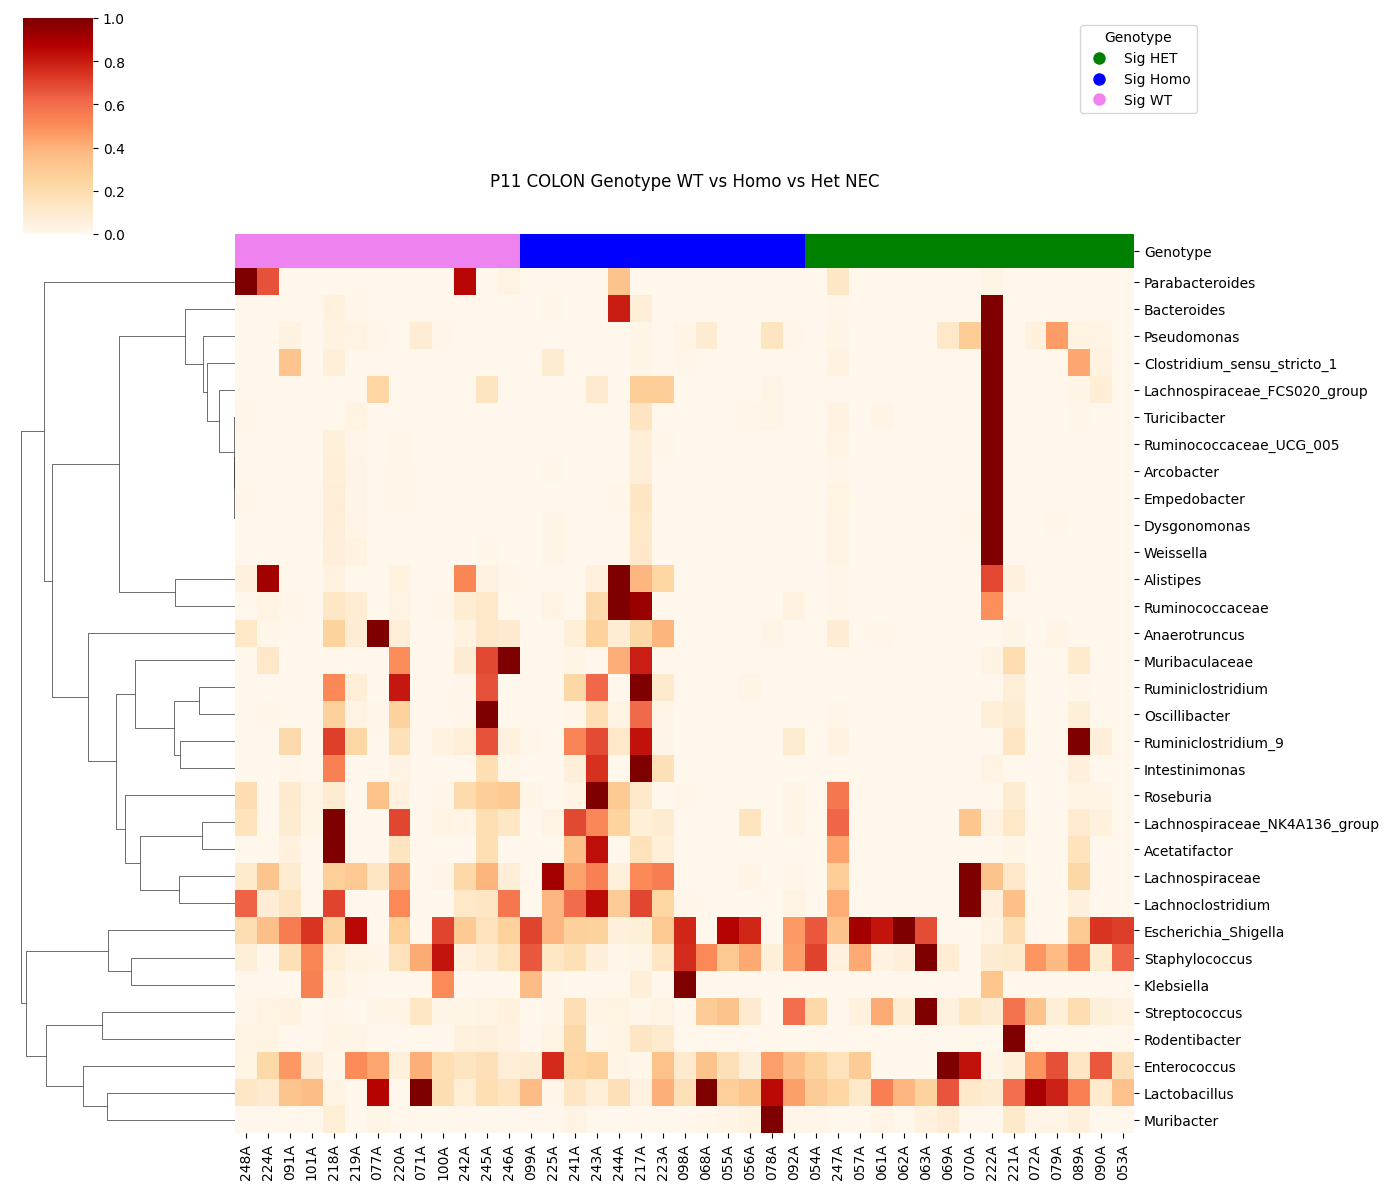

In [104]:
# Load data
P11_NEC_gt_h_h = pd.read_csv('Different_Time_Points/P11_COLON_WT_Homo_HET/NEC/TSV/data_normalized.txt',sep='\t',index_col=0)
P11_NEC_gt_metadata_h_h = pd.read_csv('Different_Time_Points/P11_COLON_WT_Homo_HET/NEC/TSV/P11_COLON_WT_Homo_HET_NEC.txt',sep='\t',index_col=0)
P11_NEC_gt_metadata_h_h = format_meta(P11_NEC_gt_metadata_h_h,"Genotype")
P11_NEC_h_h_data_heatmap = create_heatmap(P11_NEC_gt_h_h,P11_NEC_gt_metadata_h_h,"Genotype")

title = "P11 COLON Genotype WT vs Homo vs Het NEC"
P11_NEC_color_dict_gt_h_h,P11_NEC_row_colors_gt_h_h = genotypecolordict(P11_NEC_gt_metadata_h_h,"Genotype")
plot_cluster_heatmap(P11_NEC_h_h_data_heatmap,P11_NEC_color_dict_gt_h_h,P11_NEC_row_colors_gt_h_h,title)

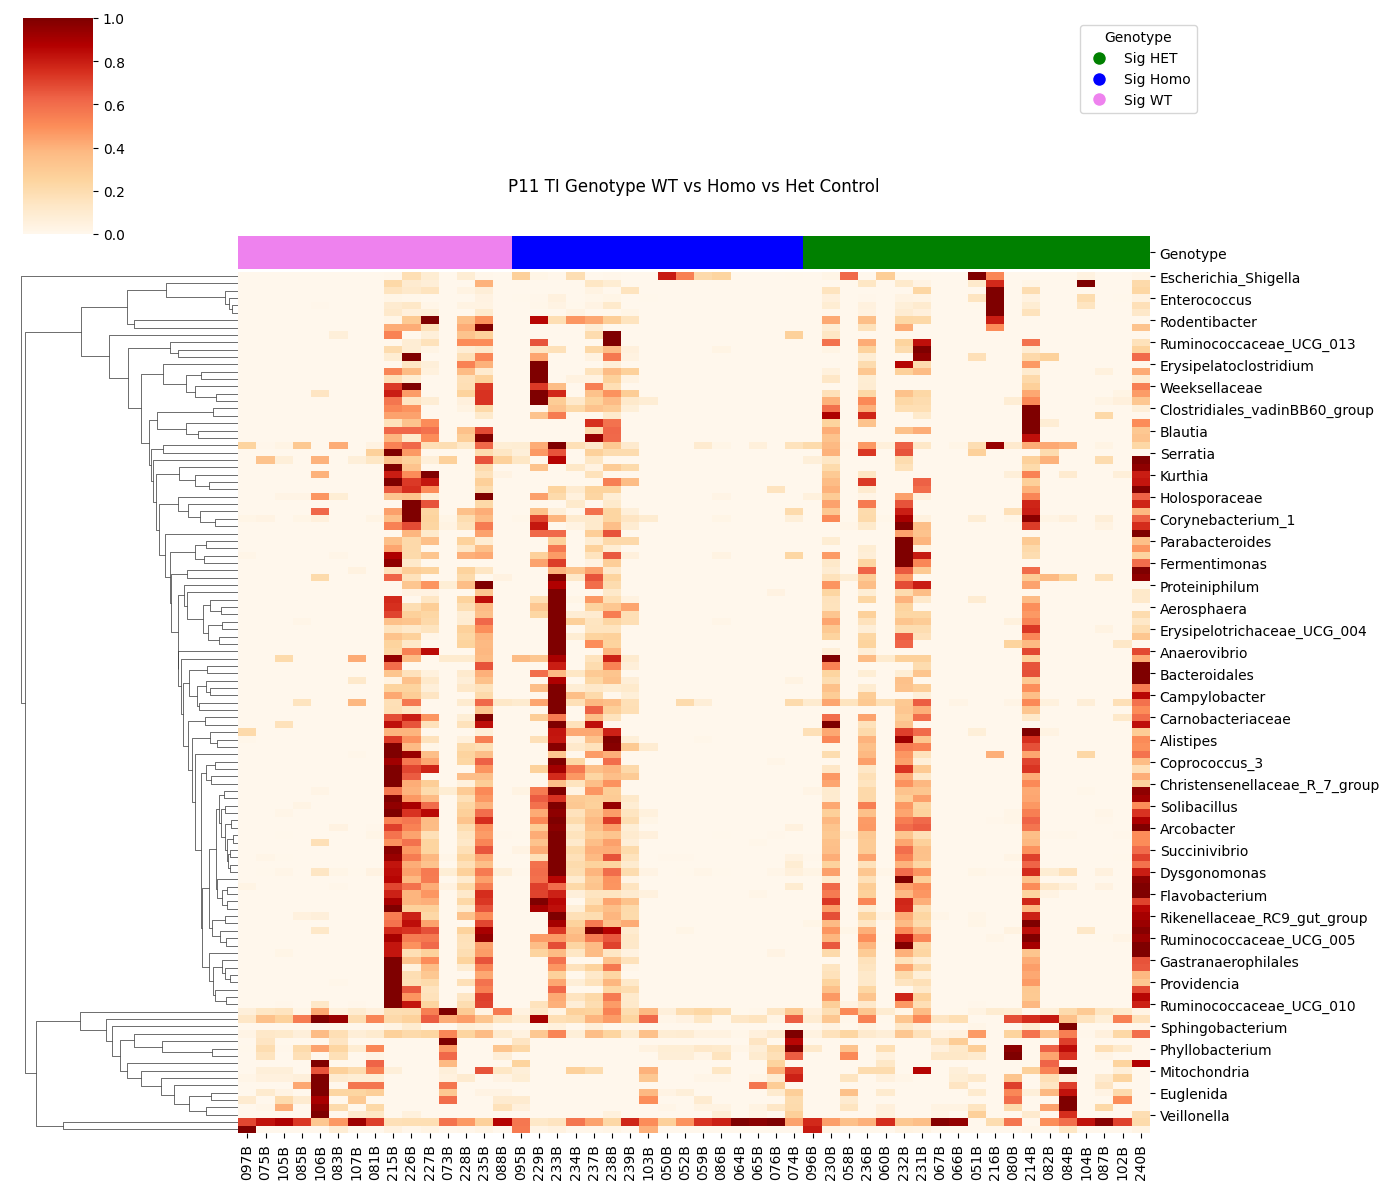

In [105]:
# Load data
P11_TI_C_gt_h_h = pd.read_csv('Different_Time_Points/P11_Ileal_WT_Homo_HET/CONTROL/tsv/data_normalized.txt',sep='\t',index_col=0)
P11_TI_C_gt_metadata_h_h = pd.read_csv('Different_Time_Points/P11_Ileal_WT_Homo_HET/CONTROL/tsv/P11_Ileal_WT_Homo_HET_C.txt',sep='\t',index_col=0)
P11_TI_C_gt_metadata_h_h = format_meta(P11_TI_C_gt_metadata_h_h,"Genotype")
P11_TI_C_h_h_data_heatmap = create_heatmap(P11_TI_C_gt_h_h,P11_TI_C_gt_metadata_h_h,"Genotype")

title = "P11 TI Genotype WT vs Homo vs Het Control"
P11_TI_C_color_dict_gt_h_h,P11_TI_C_row_colors_gt_h_h = genotypecolordict(P11_TI_C_gt_metadata_h_h,"Genotype")
plot_cluster_heatmap(P11_TI_C_h_h_data_heatmap,P11_TI_C_color_dict_gt_h_h,P11_TI_C_row_colors_gt_h_h,title)

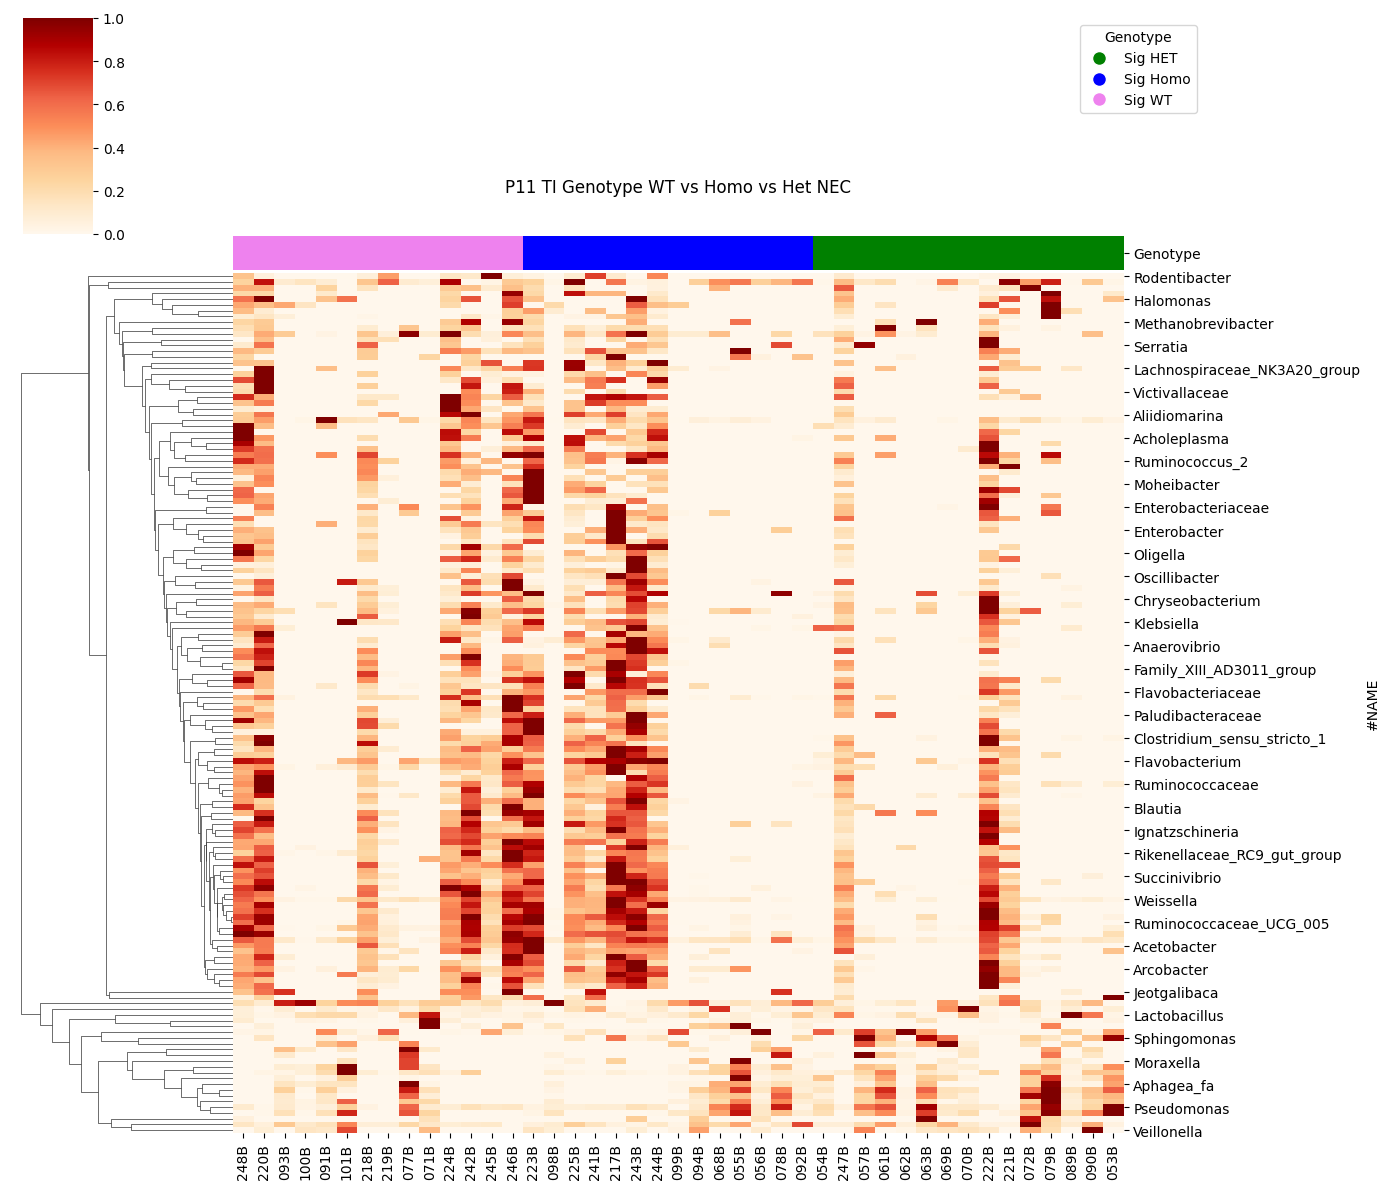

In [106]:
# Load data
P11_TI_NEC_gt_h_h = pd.read_csv('Different_Time_Points/P11_Ileal_WT_Homo_HET/NEC/tsv/data_normalized.txt',sep='\t',index_col=0)
P11_TI_NEC_gt_metadata_h_h = pd.read_csv('Different_Time_Points/P11_Ileal_WT_Homo_HET/NEC/tsv/P11_Ileal_WT_Homo_HET_NEC.txt',sep='\t',index_col=0)
P11_TI_NEC_gt_metadata_h_h = format_meta(P11_TI_NEC_gt_metadata_h_h,"Genotype")
P11_TI_NEC_h_h_data_heatmap = create_heatmap(P11_TI_NEC_gt_h_h,P11_TI_NEC_gt_metadata_h_h,"Genotype")

title = "P11 TI Genotype WT vs Homo vs Het NEC"
P11_TI_NEC_color_dict_gt_h_h,P11_TI_NEC_row_colors_gt_h_h = genotypecolordict(P11_TI_NEC_gt_metadata_h_h,"Genotype")
plot_cluster_heatmap(P11_TI_NEC_h_h_data_heatmap,P11_TI_NEC_color_dict_gt_h_h,P11_TI_NEC_row_colors_gt_h_h,title)

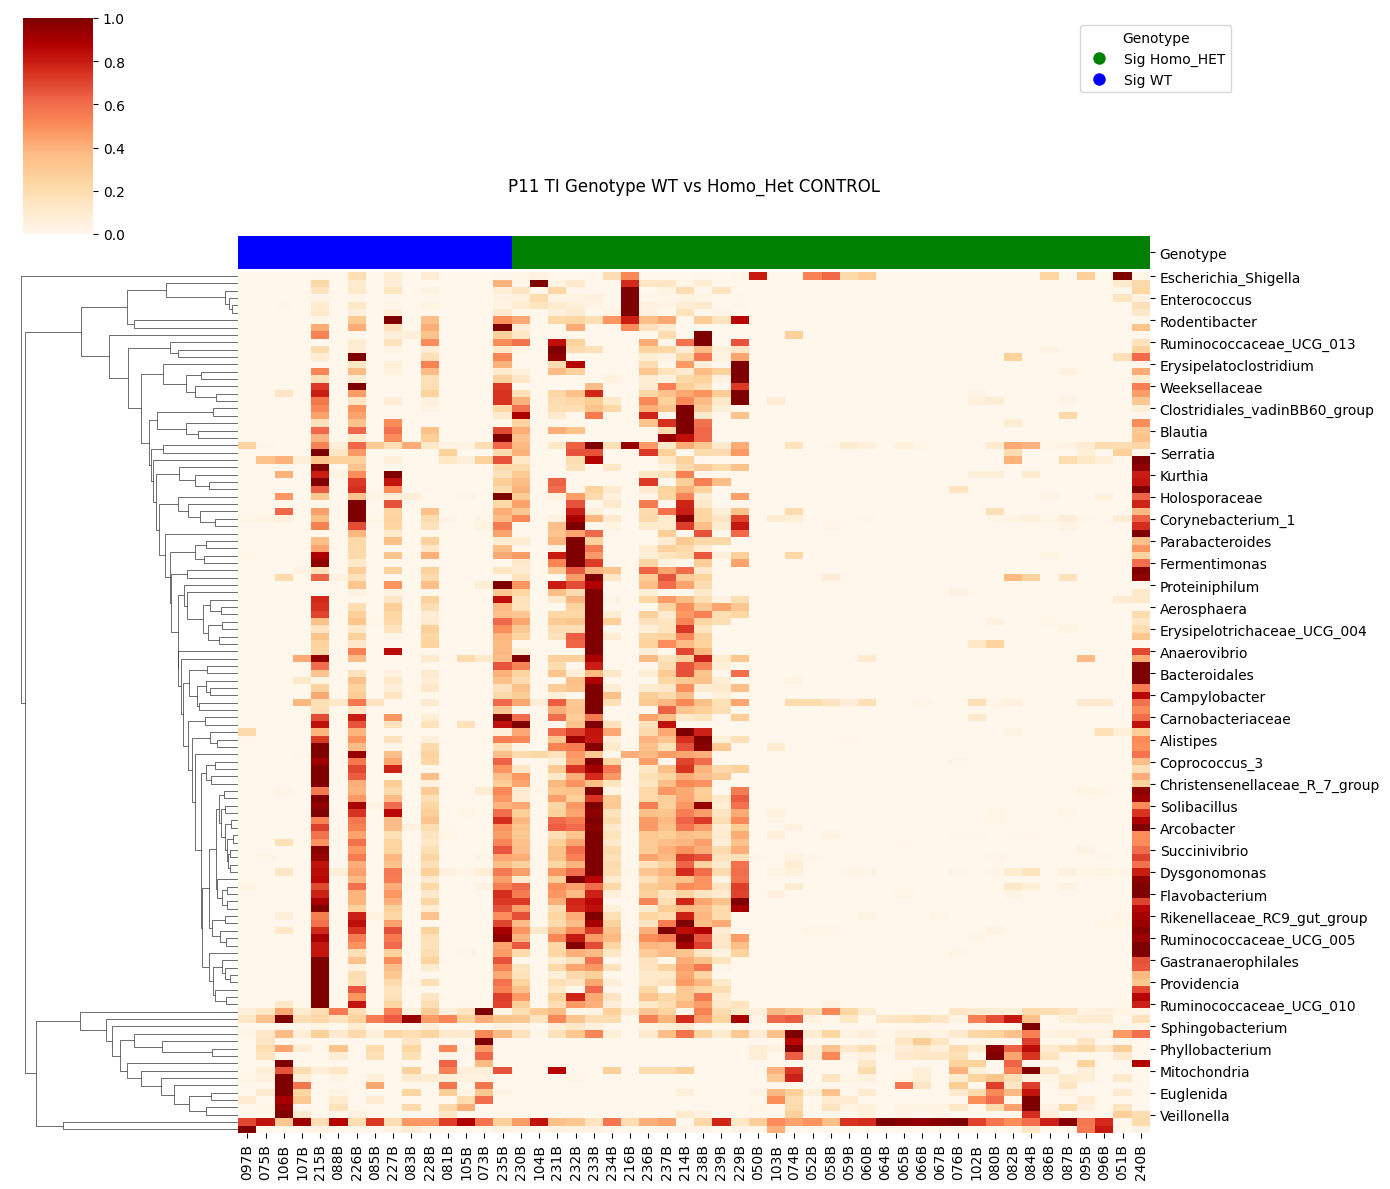

In [107]:
# Load data
P11_TI_C_gt_hh = pd.read_csv('Different_Time_Points/P11_Ileal_WT_HomoHET/CONTROL/tsv/data_normalized.txt',sep='\t',index_col=0)
P11_TI_C_gt_metadata_hh = pd.read_csv('Different_Time_Points/P11_Ileal_WT_HomoHET/CONTROL/tsv/P11_Ileal_WT_HomoHET_C.txt',sep='\t',index_col=0)
P11_TI_C_gt_metadata_hh = format_meta(P11_TI_C_gt_metadata_hh,"Genotype")
P11_TI_C_hh_data_heatmap = create_heatmap(P11_TI_C_gt_hh,P11_TI_C_gt_metadata_hh,"Genotype")

title = "P11 TI Genotype WT vs Homo_Het CONTROL"
P11_TI_C_color_dict_gt_hh,P11_TI_C_row_colors_gt_hh = genotypecolordict(P11_TI_C_gt_metadata_hh,"Genotype")
plot_cluster_heatmap(P11_TI_C_hh_data_heatmap,P11_TI_C_color_dict_gt_hh,P11_TI_C_row_colors_gt_hh,title)

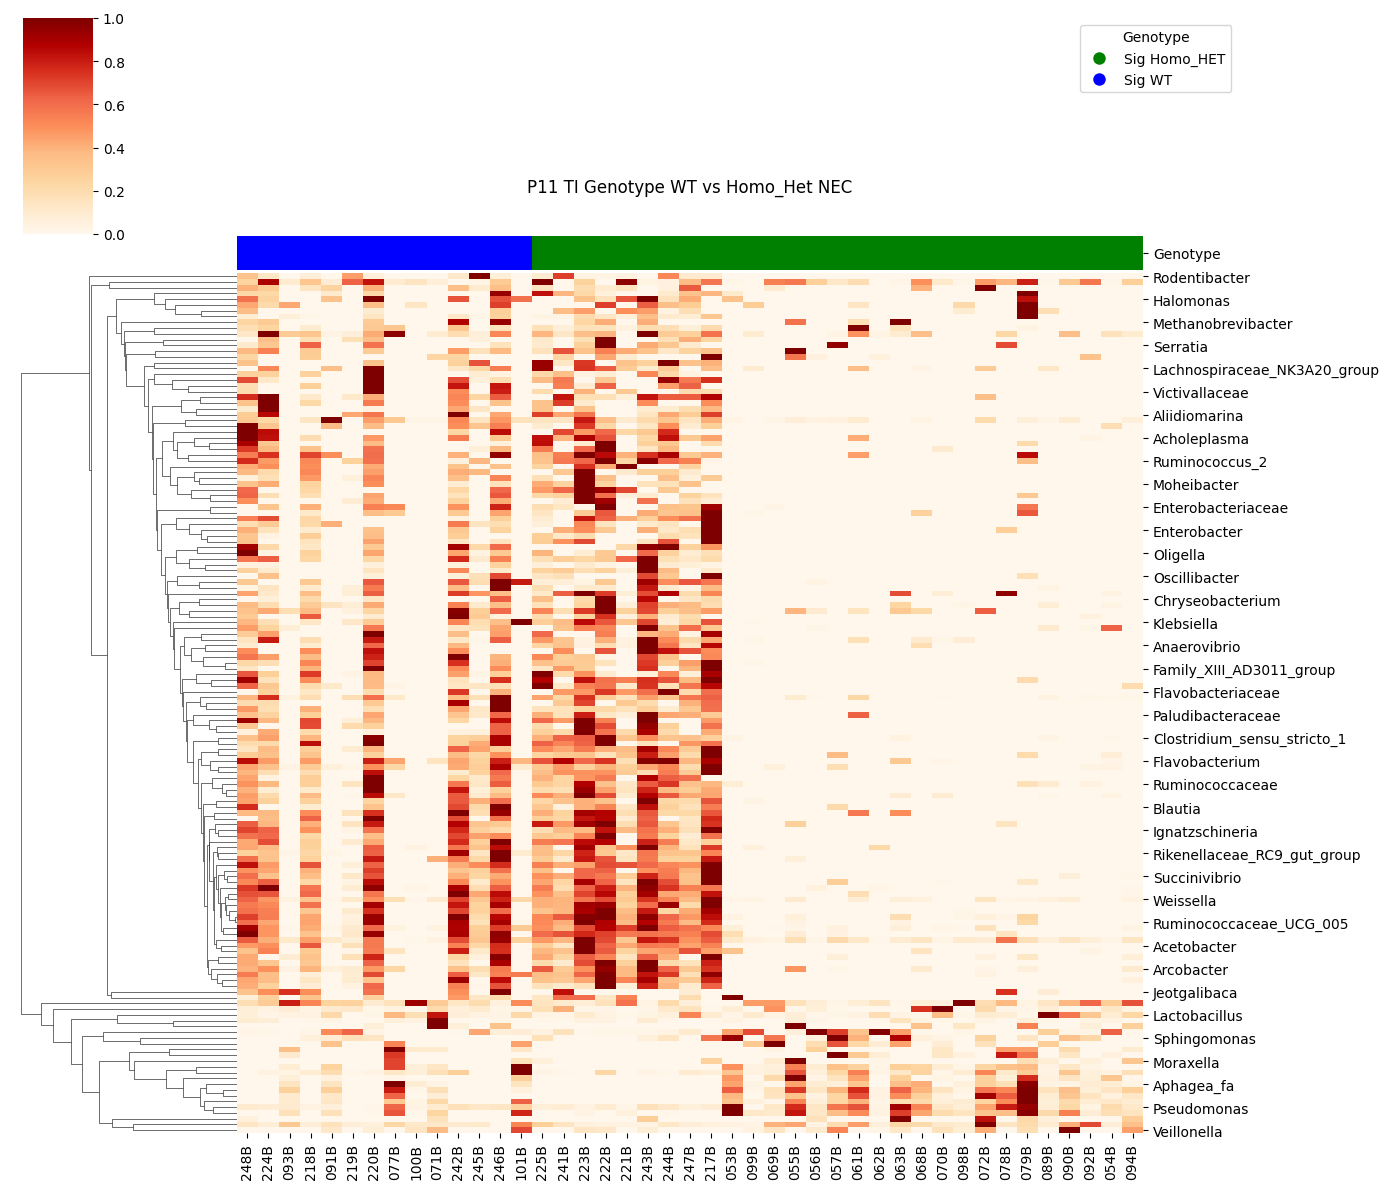

In [108]:
# Load data
P11_TI_NEC_gt_hh = pd.read_csv('Different_Time_Points/P11_Ileal_WT_HomoHET/NEC/tsv/data_normalized.txt',sep='\t',index_col=0)
P11_TI_NEC_gt_metadata_hh = pd.read_csv('Different_Time_Points/P11_Ileal_WT_HomoHET/NEC/tsv/P11_Ileal_WT_HomoHET_NEC.txt',sep='\t',index_col=0)
P11_TI_NEC_gt_metadata_hh = format_meta(P11_TI_NEC_gt_metadata_hh,"Genotype")
P11_TI_NEC_hh_data_heatmap = create_heatmap(P11_TI_NEC_gt_hh,P11_TI_NEC_gt_metadata_hh,"Genotype")

title = "P11 TI Genotype WT vs Homo_Het NEC"
P11_TI_NEC_color_dict_gt_hh,P11_TI_NEC_row_colors_gt_hh = genotypecolordict(P11_TI_NEC_gt_metadata_hh,"Genotype")
plot_cluster_heatmap(P11_TI_NEC_hh_data_heatmap,P11_TI_NEC_color_dict_gt_hh,P11_TI_NEC_row_colors_gt_hh,title)

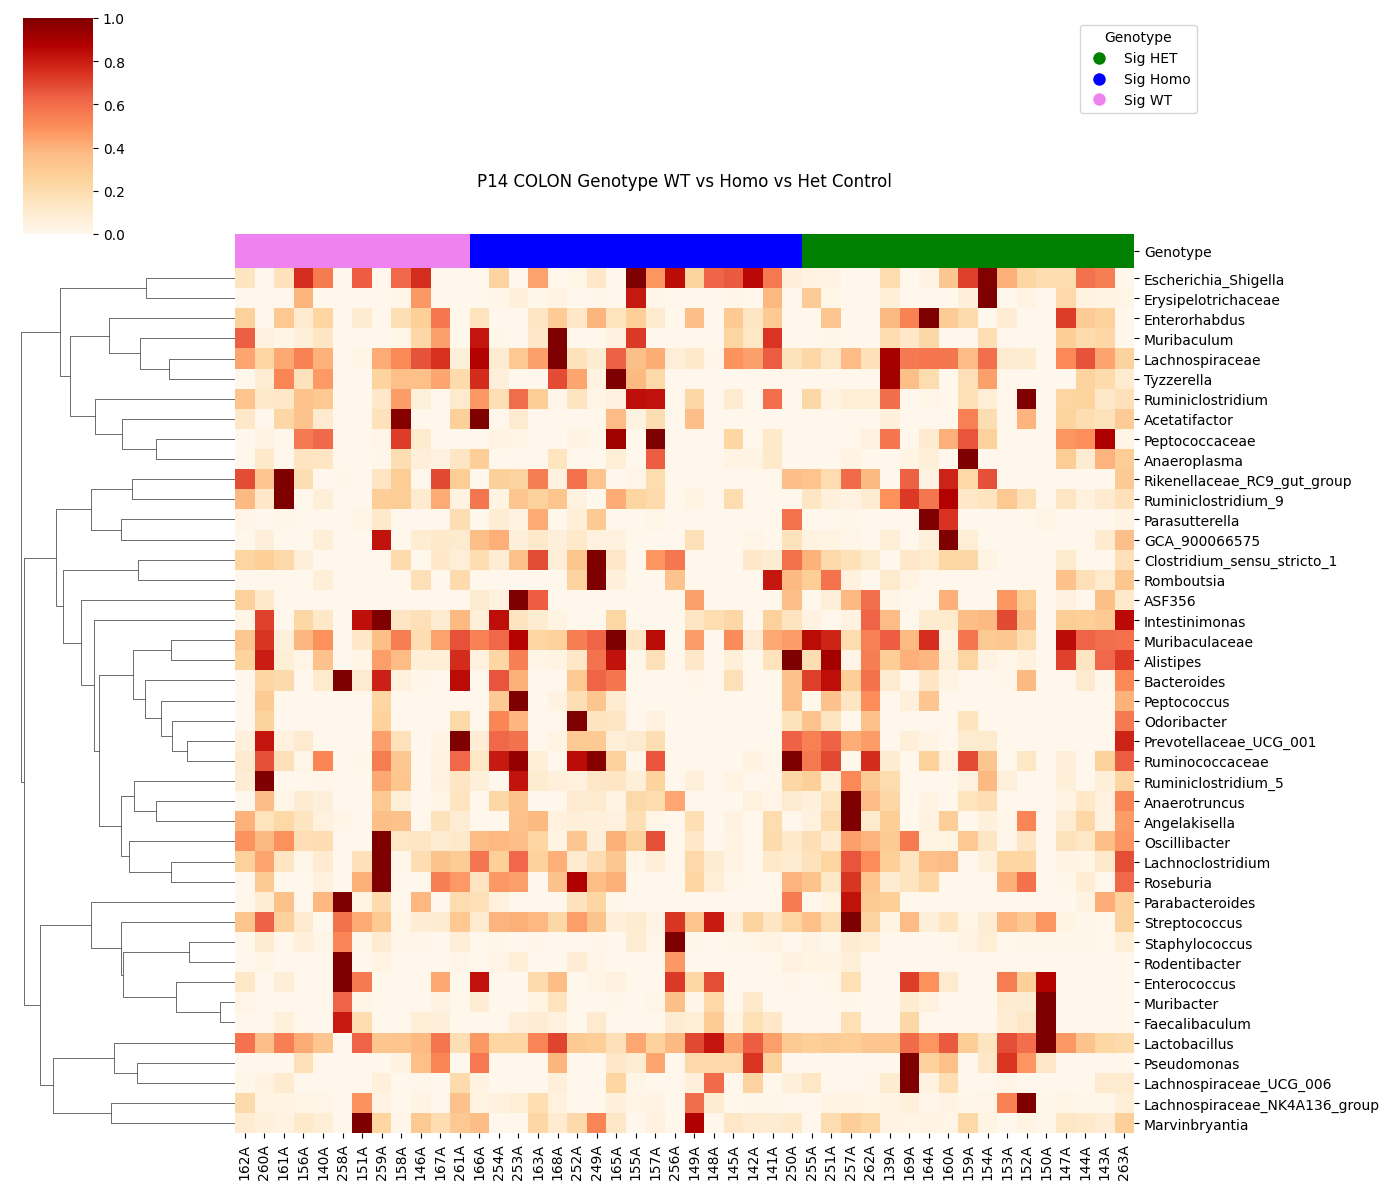

In [109]:
# Load data
P14_COLON_C_gt_h_h = pd.read_csv('Different_Time_Points/P14_COLON_WT_Homo_HET/CONTROL/tsv/data_normalized.txt',sep='\t',index_col=0)
P14_COLON_C_gt_metadata_h_h = pd.read_csv('Different_Time_Points/P14_COLON_WT_Homo_HET/CONTROL/tsv/P14_COLON_WT_Homo_HET_C.txt',sep='\t',index_col=0)
P14_COLON_C_gt_metadata_h_h = format_meta(P14_COLON_C_gt_metadata_h_h,"Genotype")
P14_COLON_C_h_h_data_heatmap = create_heatmap(P14_COLON_C_gt_h_h,P14_COLON_C_gt_metadata_h_h,"Genotype")

title = "P14 COLON Genotype WT vs Homo vs Het Control"
P14_COLON_C_color_dict_gt_h_h,P14_COLON_C_row_colors_gt_h_h = genotypecolordict(P14_COLON_C_gt_metadata_h_h,"Genotype")
plot_cluster_heatmap(P14_COLON_C_h_h_data_heatmap,P14_COLON_C_color_dict_gt_h_h,P14_COLON_C_row_colors_gt_h_h,title)

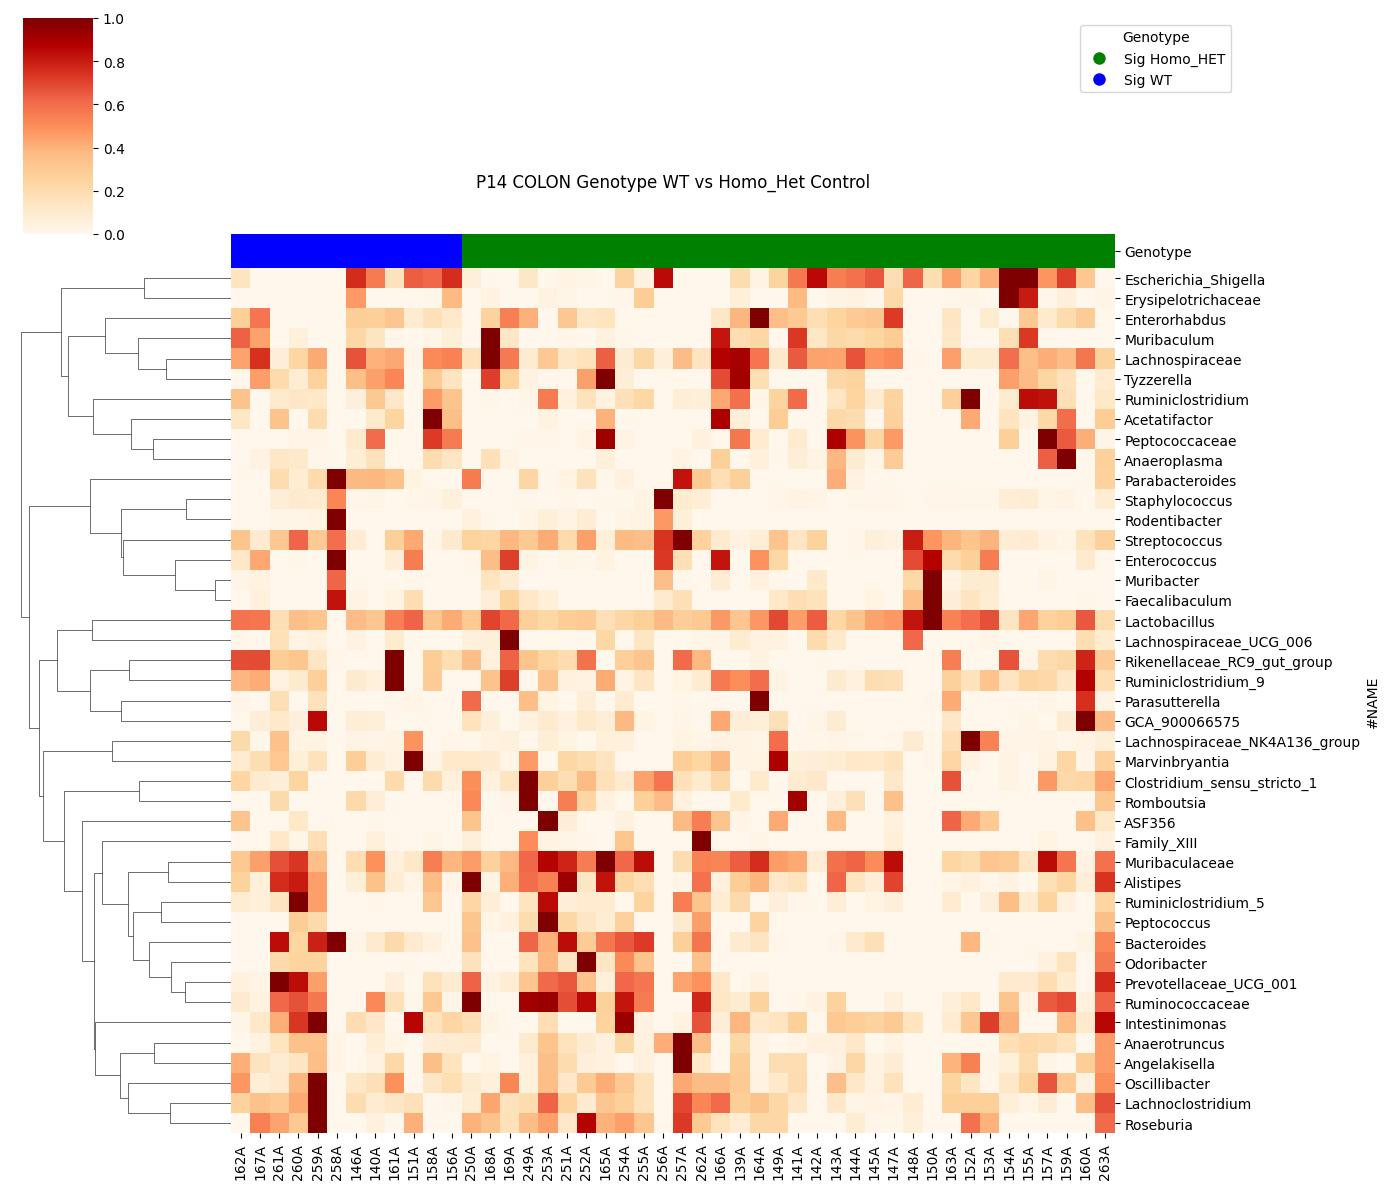

In [110]:
# Load data
P14_COLON_C_gt_hh = pd.read_csv('Different_Time_Points/P14_COLON_WT_HomoHET/tsv/data_normalized.txt',sep='\t',index_col=0)
P14_COLON_C_gt_metadata_hh = pd.read_csv('Different_Time_Points/P14_COLON_WT_HomoHET/tsv/P14_COLON_WT_HomoHET.txt',sep='\t',index_col=0)
P14_COLON_C_gt_metadata_hh = format_meta(P14_COLON_C_gt_metadata_hh,"Genotype")
P14_COLON_C_hh_data_heatmap = create_heatmap(P14_COLON_C_gt_hh,P14_COLON_C_gt_metadata_hh,"Genotype")

title = "P14 COLON Genotype WT vs Homo_Het Control"
P14_COLON_C_color_dict_gt_hh,P14_COLON_C_row_colors_gt_hh = genotypecolordict(P14_COLON_C_gt_metadata_hh,"Genotype")
plot_cluster_heatmap(P14_COLON_C_hh_data_heatmap,P14_COLON_C_color_dict_gt_hh,P14_COLON_C_row_colors_gt_hh,title)

### Take a look

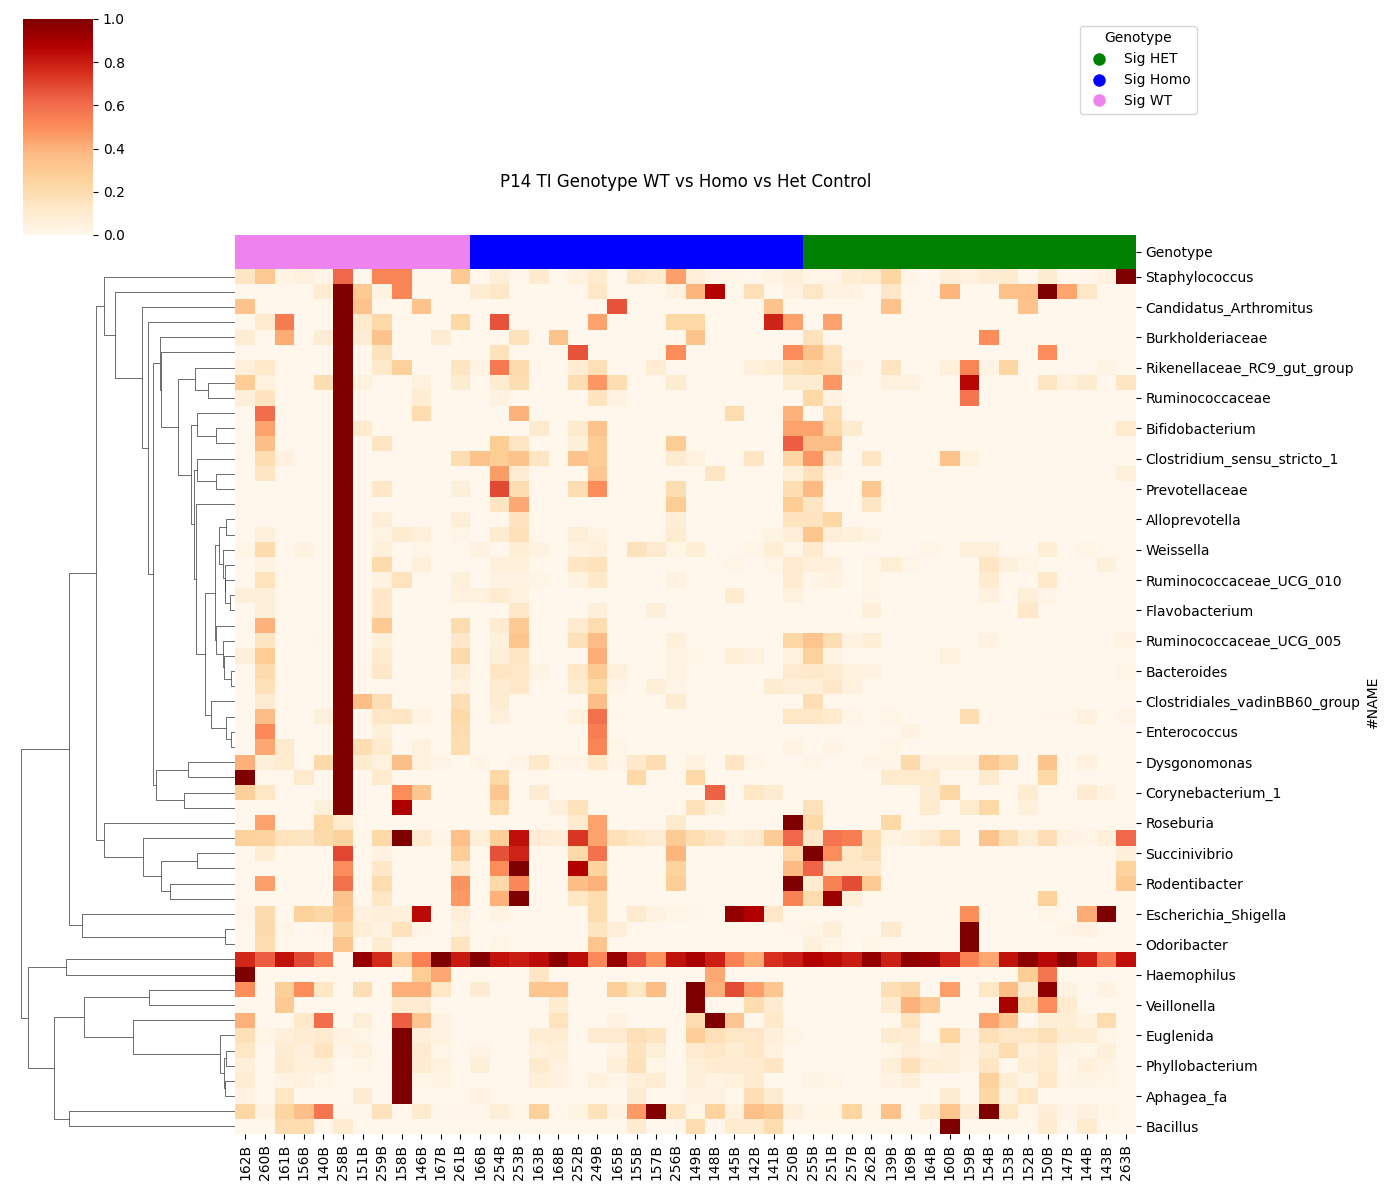

In [111]:
# Load data
P14_TI_C_gt_h_h = pd.read_csv('Different_Time_Points/P14_Ileal_WT_Homo_HET/tsv/data_normalized.txt',sep='\t',index_col=0)
P14_TI_C_gt_metadata_h_h = pd.read_csv('Different_Time_Points/P14_Ileal_WT_Homo_HET/tsv/P14_Ileal_WT_Homo_HET_C.txt',sep='\t',index_col=0)
P14_TI_C_gt_metadata_h_h = format_meta(P14_TI_C_gt_metadata_h_h,"Genotype")
P14_TI_C_h_h_data_heatmap = create_heatmap(P14_TI_C_gt_h_h,P14_TI_C_gt_metadata_h_h,"Genotype")

title = "P14 TI Genotype WT vs Homo vs Het Control"
P14_TI_C_color_dict_gt_h_h,P14_TI_C_row_colors_gt_h_h = genotypecolordict(P14_TI_C_gt_metadata_h_h,"Genotype")
plot_cluster_heatmap(P14_TI_C_h_h_data_heatmap,P14_TI_C_color_dict_gt_h_h,P14_TI_C_row_colors_gt_h_h,title)

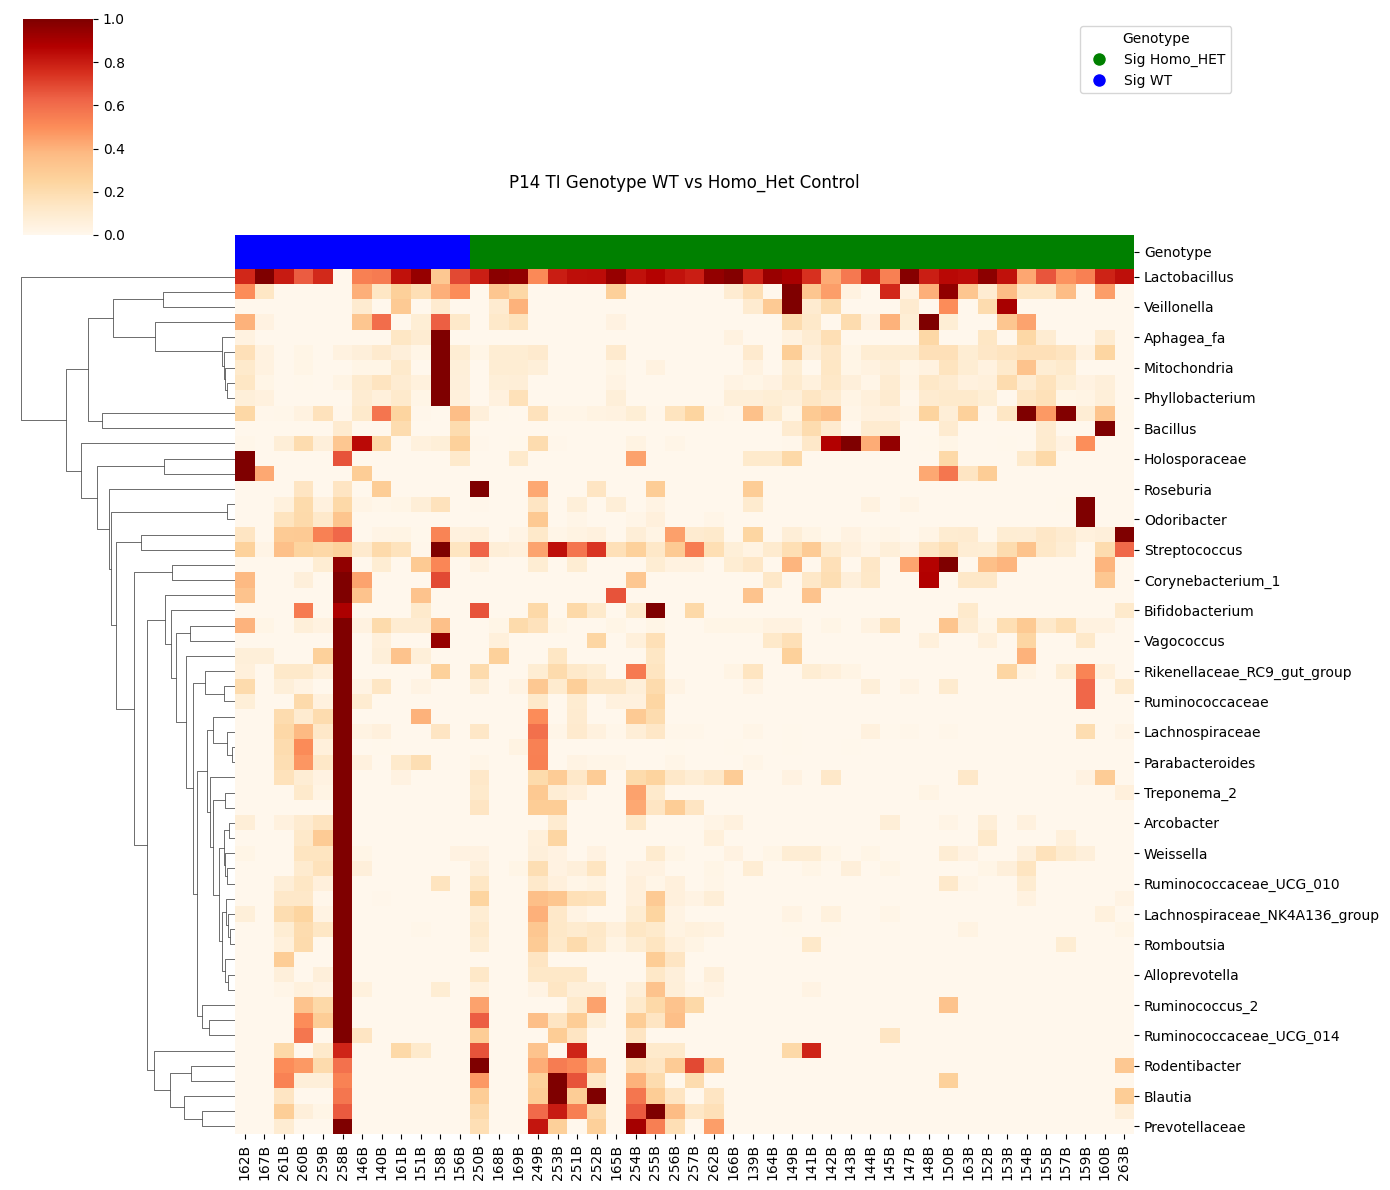

In [112]:
# Load data
P14_TI_C_gt_hh = pd.read_csv('Different_Time_Points/P14_Ileal_WT_HomoHET/tsv/data_normalized.txt',sep='\t',index_col=0)
P14_TI_C_gt_metadata_hh = pd.read_csv('Different_Time_Points/P14_Ileal_WT_HomoHET/tsv/P14_Ileal_WT_HomoHET.txt',sep='\t',index_col=0)
P14_TI_C_gt_metadata_hh = format_meta(P14_TI_C_gt_metadata_hh,"Genotype")
P14_TI_C_hh_data_heatmap = create_heatmap(P14_TI_C_gt_hh,P14_TI_C_gt_metadata_hh,"Genotype")

title = "P14 TI Genotype WT vs Homo_Het Control"
P14_TI_C_color_dict_gt_hh,P14_TI_C_row_colors_gt_hh = genotypecolordict(P14_TI_C_gt_metadata_hh,"Genotype")
plot_cluster_heatmap(P14_TI_C_hh_data_heatmap,P14_TI_C_color_dict_gt_hh,P14_TI_C_row_colors_gt_hh,title)

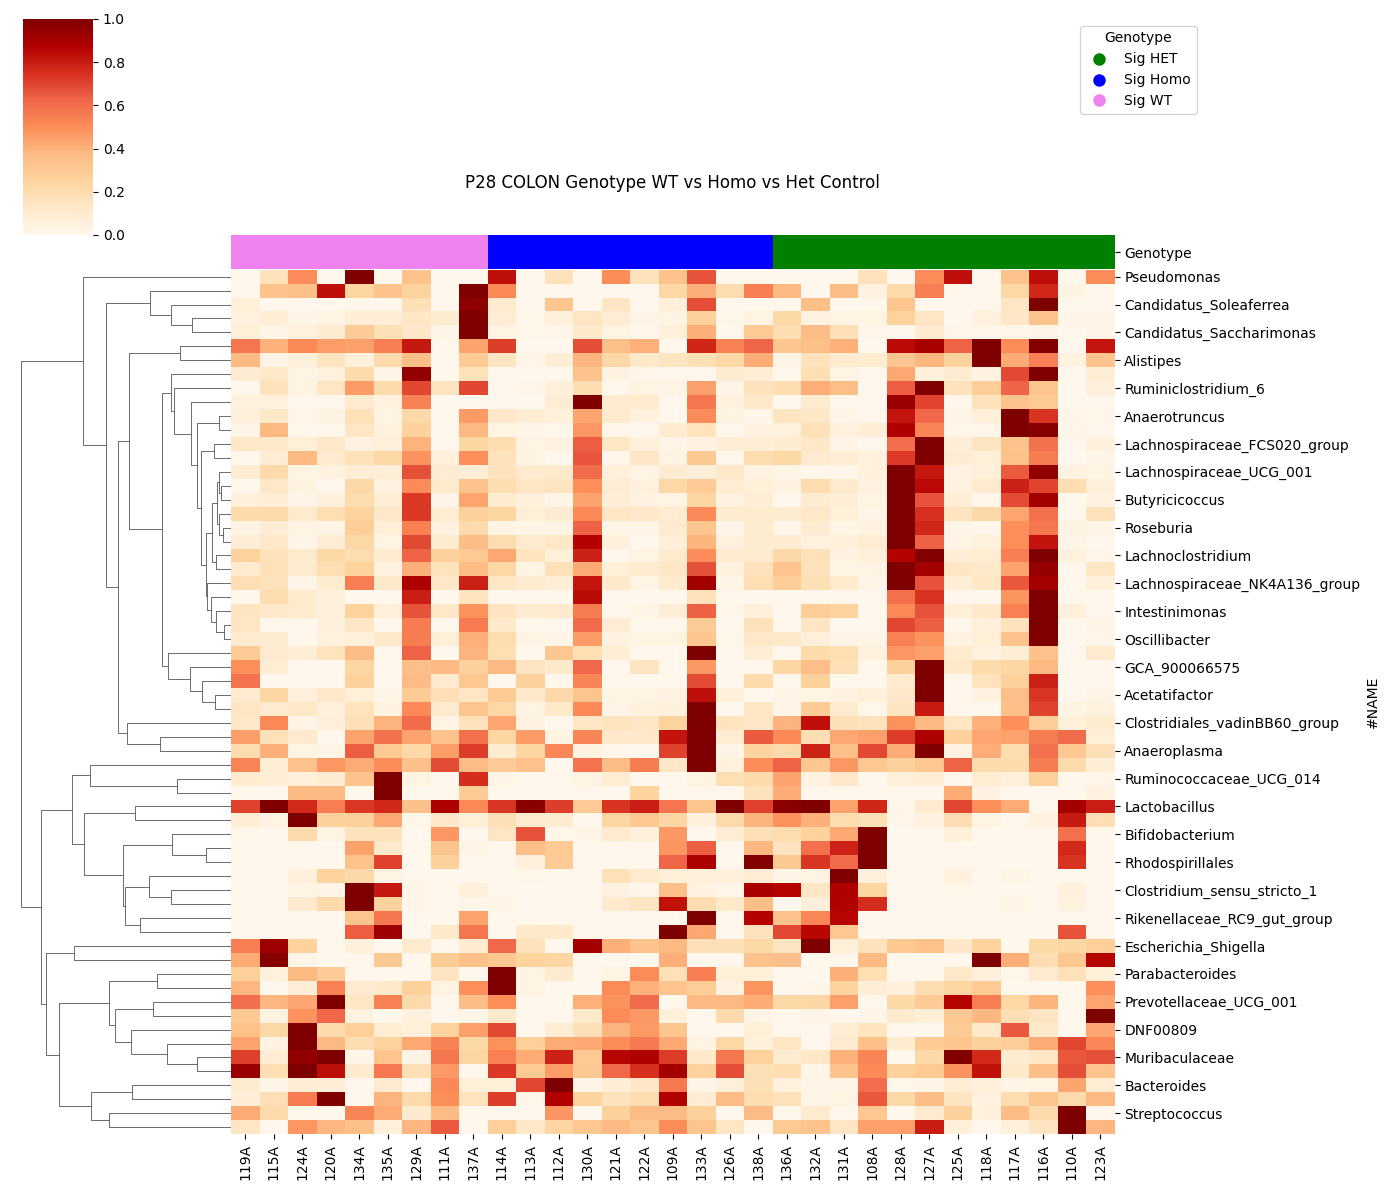

In [113]:
# Load data
P28_COLON_C_gt_h_h = pd.read_csv('Different_Time_Points/P28_COLON_WT_Homo_HET/tsv/data_normalized.txt',sep='\t',index_col=0)
P28_COLON_C_gt_metadata_h_h = pd.read_csv('Different_Time_Points/P28_COLON_WT_Homo_HET/tsv/P28_COLON_WT_Homo_HET.txt',sep='\t',index_col=0)
P28_COLON_C_gt_metadata_h_h = format_meta(P28_COLON_C_gt_metadata_h_h,"Genotype")
P28_COLON_C_h_h_data_heatmap = create_heatmap(P28_COLON_C_gt_h_h,P28_COLON_C_gt_metadata_h_h,"Genotype")

title = "P28 COLON Genotype WT vs Homo vs Het Control"
P28_COLON_C_color_dict_gt_h_h,P28_COLON_C_row_colors_gt_h_h = genotypecolordict(P28_COLON_C_gt_metadata_h_h,"Genotype")
plot_cluster_heatmap(P28_COLON_C_h_h_data_heatmap,P28_COLON_C_color_dict_gt_h_h,P28_COLON_C_row_colors_gt_h_h,title)

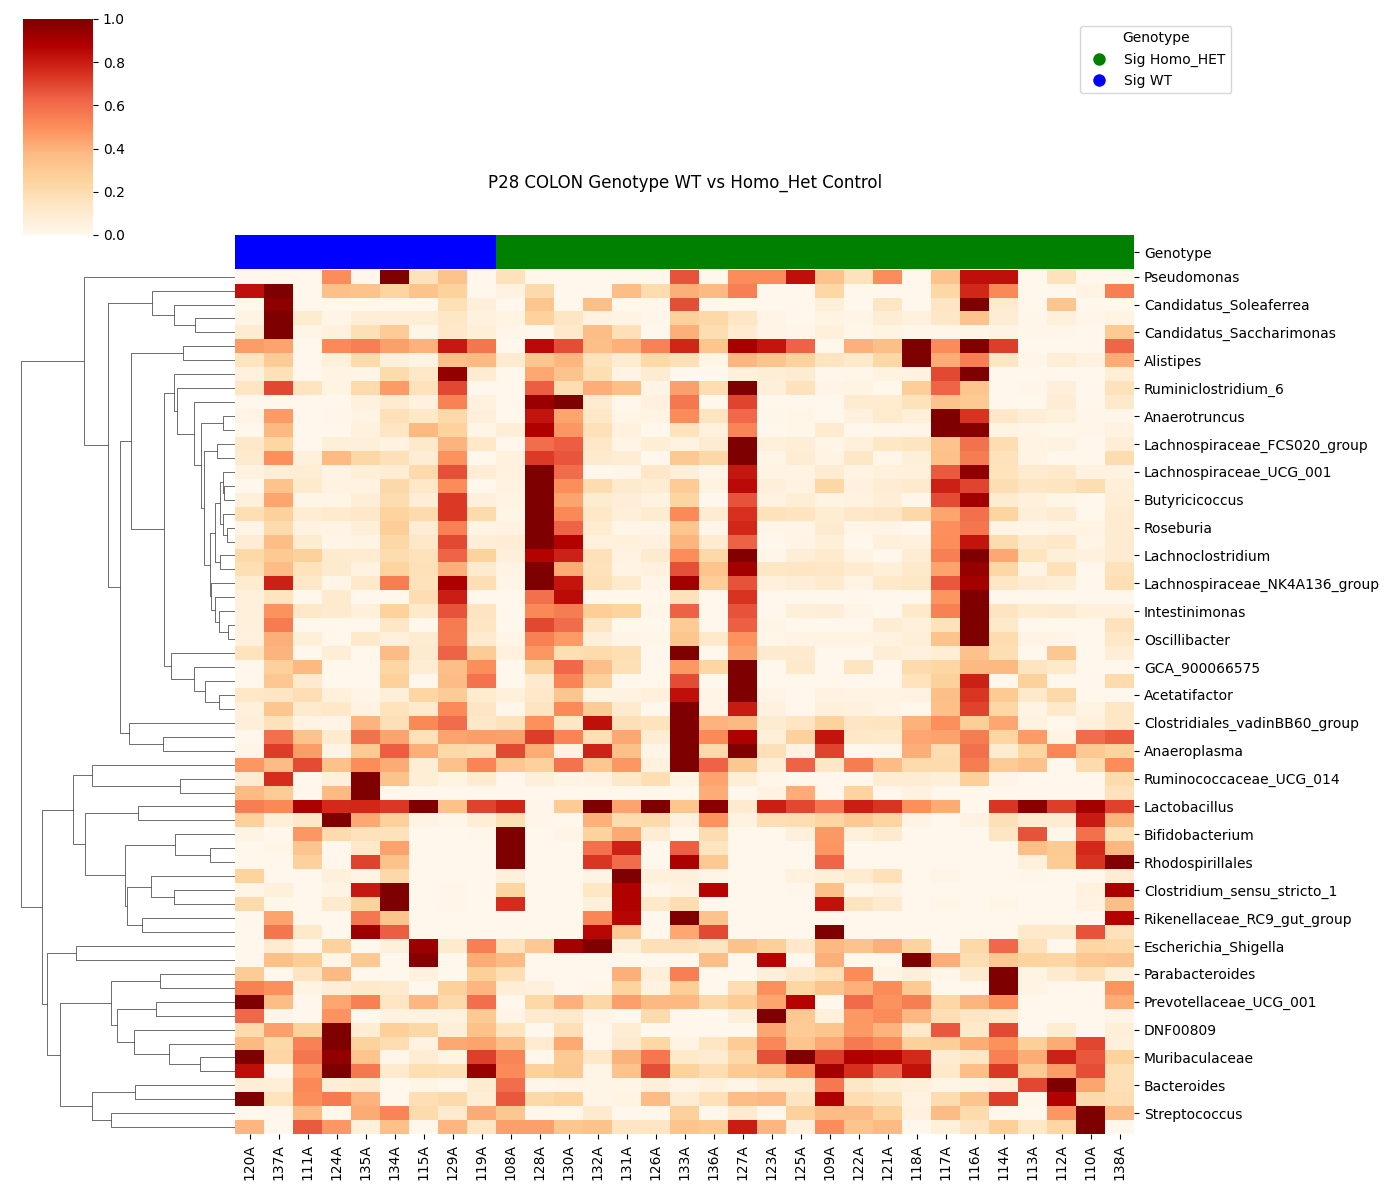

In [114]:
# Load data
P28_COLON_C_gt_hh = pd.read_csv('Different_Time_Points/P28_COLON_WT_HomoHET/tsv/data_normalized.txt',sep='\t',index_col=0)
P28_COLON_C_gt_metadata_hh = pd.read_csv('Different_Time_Points/P28_COLON_WT_HomoHET/tsv/P28_COLON_WT_HomoHET.txt',sep='\t',index_col=0)
P28_COLON_C_gt_metadata_hh = format_meta(P28_COLON_C_gt_metadata_hh,"Genotype")
P28_COLON_C_hh_data_heatmap = create_heatmap(P28_COLON_C_gt_hh,P28_COLON_C_gt_metadata_hh,"Genotype")

title = "P28 COLON Genotype WT vs Homo_Het Control"
P28_COLON_C_color_dict_gt_hh,P28_COLON_C_row_colors_gt_hh = genotypecolordict(P28_COLON_C_gt_metadata_hh,"Genotype")
plot_cluster_heatmap(P28_COLON_C_hh_data_heatmap,P28_COLON_C_color_dict_gt_hh,P28_COLON_C_row_colors_gt_hh,title)

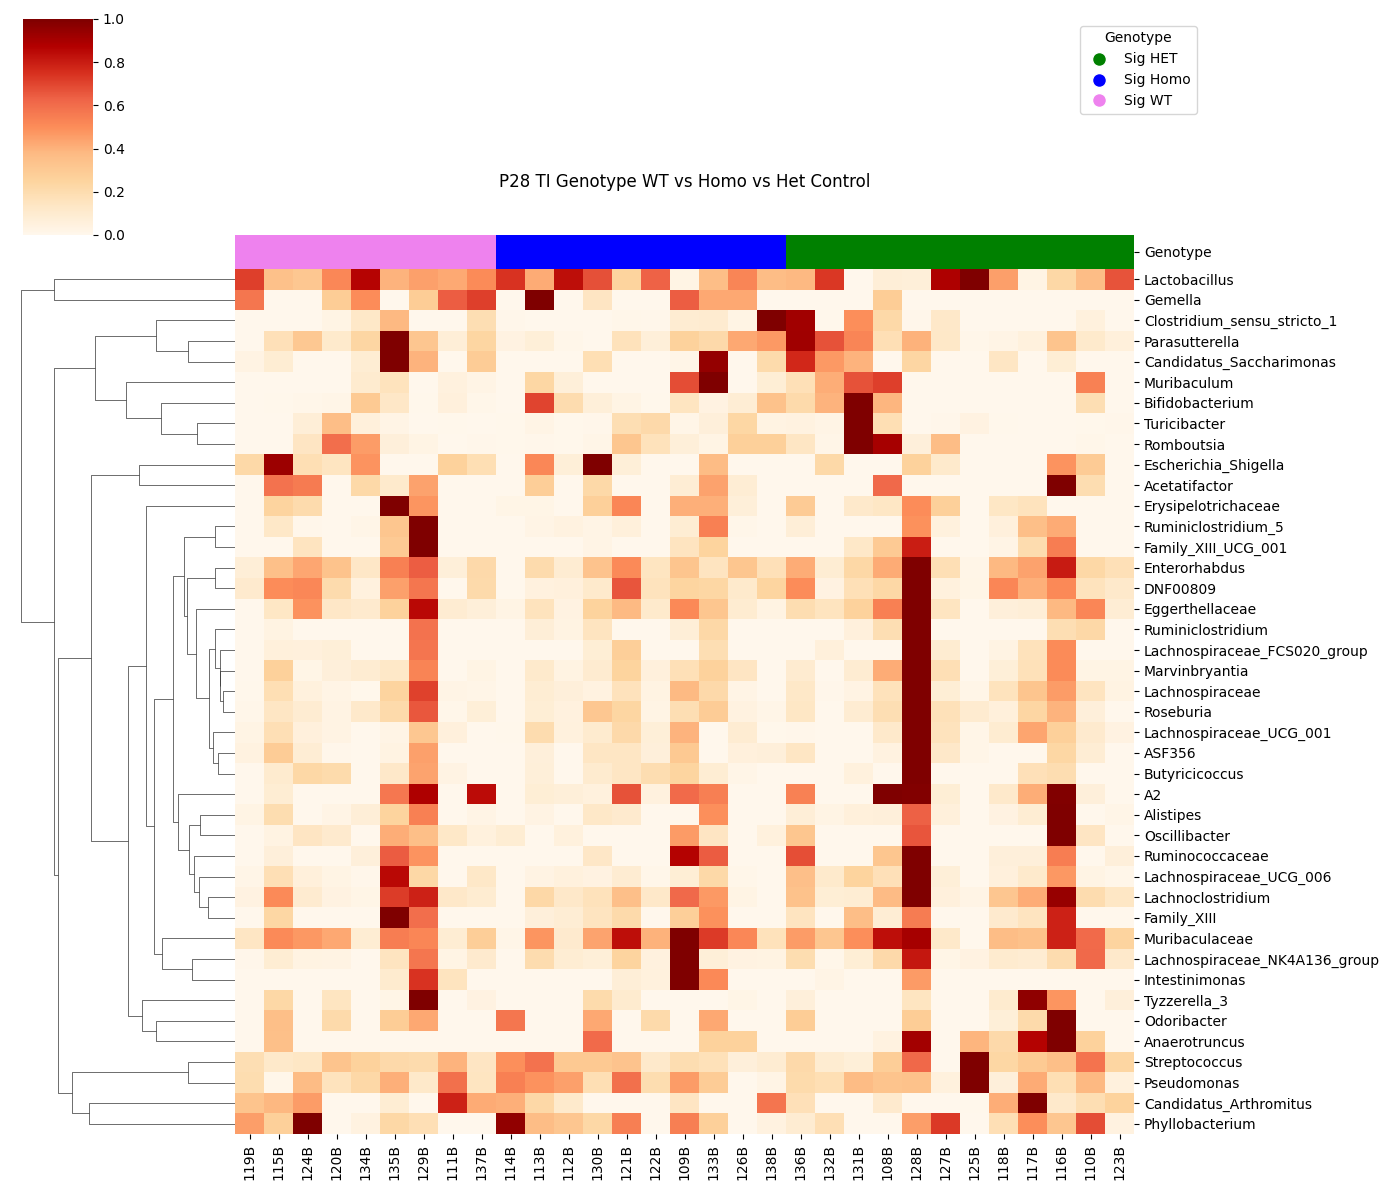

In [115]:
# Load data
P28_TI_C_gt_h_h = pd.read_csv('Different_Time_Points/P28_Ileal_WT_Homo_HET/tsv/data_normalized.txt',sep='\t',index_col=0)
P28_TI_C_gt_metadata_h_h = pd.read_csv('Different_Time_Points/P28_Ileal_WT_Homo_HET/tsv/P28_Ileal_WT_Homo_HET.txt',sep='\t',index_col=0)
P28_TI_C_gt_metadata_h_h = format_meta(P28_TI_C_gt_metadata_h_h,"Genotype")
P28_TI_C_h_h_data_heatmap = create_heatmap(P28_TI_C_gt_h_h,P28_TI_C_gt_metadata_h_h,"Genotype")

title = "P28 TI Genotype WT vs Homo vs Het Control"
P28_TI_C_color_dict_gt_h_h,P28_TI_C_row_colors_gt_h_h = genotypecolordict(P28_TI_C_gt_metadata_h_h,"Genotype")
plot_cluster_heatmap(P28_TI_C_h_h_data_heatmap,P28_TI_C_color_dict_gt_h_h,P28_TI_C_row_colors_gt_h_h,title)

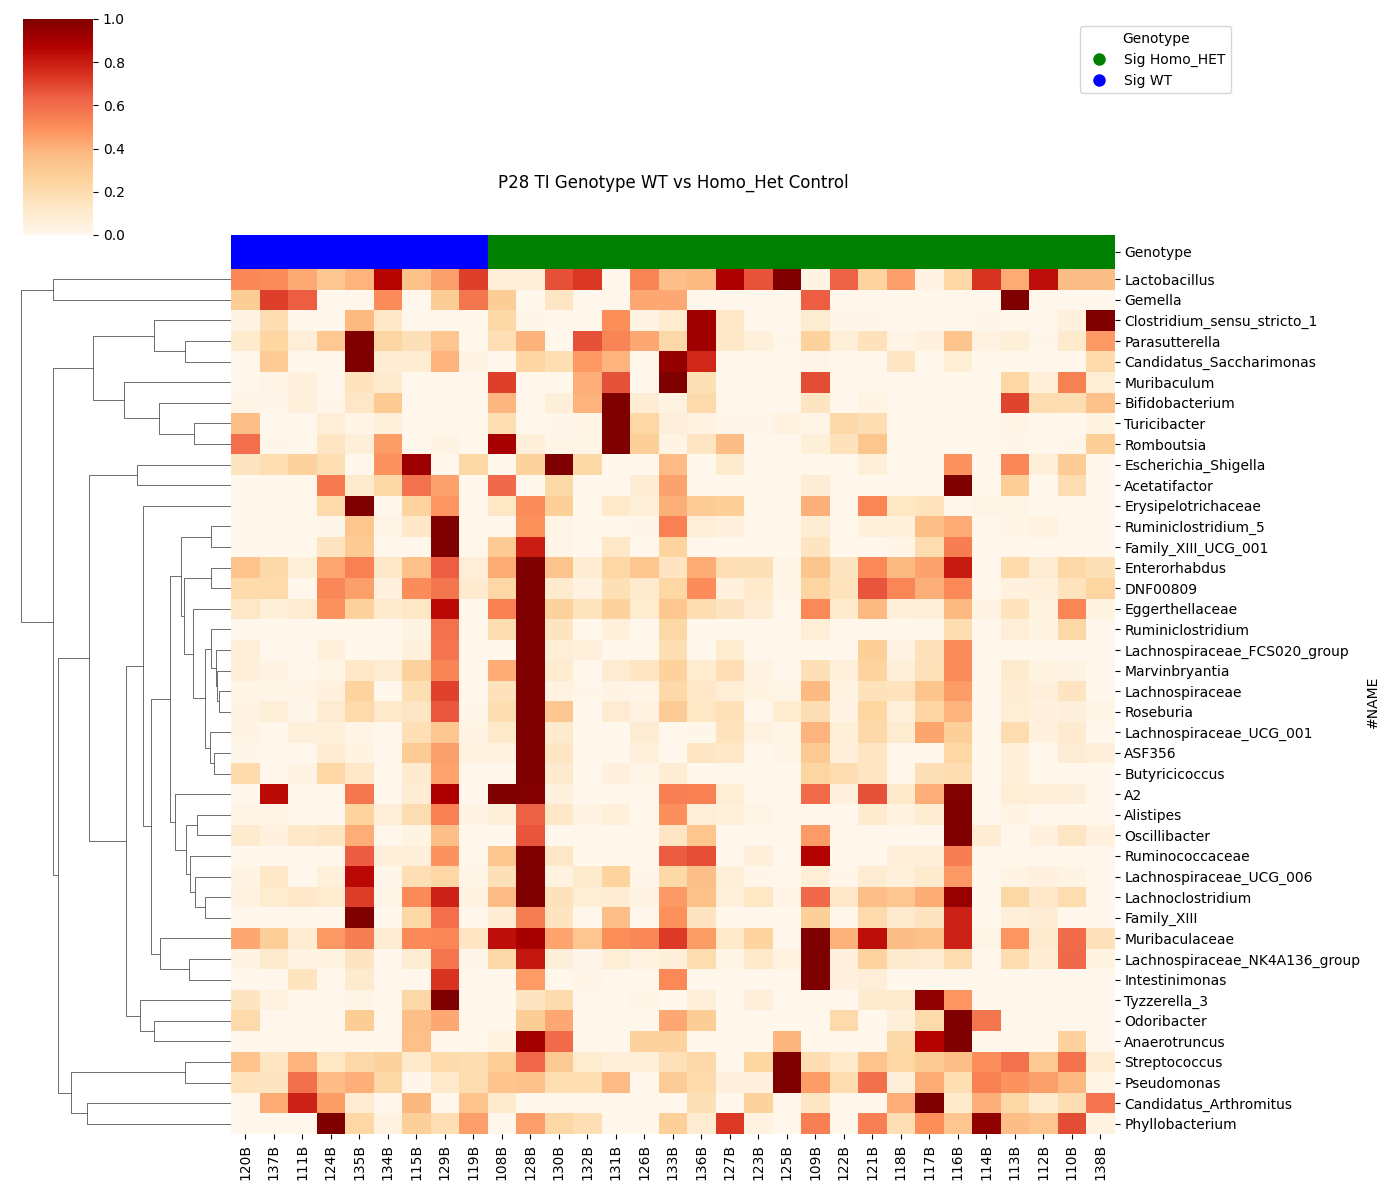

In [116]:
# Load data
P28_TI_C_gt_hh = pd.read_csv('Different_Time_Points/P28_Ileal_WT_HomoHET/tsv/data_normalized.txt',sep='\t',index_col=0)
P28_TI_C_gt_metadata_hh = pd.read_csv('Different_Time_Points/P28_Ileal_WT_HomoHET/tsv/P11_P14_P28_Ileal_WT_HomoHET.txt',sep='\t',index_col=0)
P28_TI_C_gt_metadata_hh = format_meta(P28_TI_C_gt_metadata_hh,"Genotype")
P28_TI_C_hh_data_heatmap = create_heatmap(P28_TI_C_gt_hh,P28_TI_C_gt_metadata_hh,"Genotype")

title = "P28 TI Genotype WT vs Homo_Het Control"
P28_TI_C_color_dict_gt_hh,P28_TI_C_row_colors_gt_hh = genotypecolordict(P28_TI_C_gt_metadata_hh,"Genotype")
plot_cluster_heatmap(P28_TI_C_hh_data_heatmap,P28_TI_C_color_dict_gt_hh,P28_TI_C_row_colors_gt_hh,title)